<a id='initialisation'></a>
___
___
## <font color='coral'>**Appel de l'environment** </font> [▲](#sommaire)

In [1]:
%reset -f
import ipywidgets as widgets
%matplotlib widget
from ipywidgets import Layout, interact
import matplotlib.pyplot as plt
from RVutils import *
import numpy as np
from scipy.stats import linregress
import matplotlib.colors as mcolors
from IPython.display import clear_output
import random

try:
    import screeninfo
    # get the primary monitor
    screen = screeninfo.get_monitors()[0]
    # print the screen size
    print("Screen size: {} mm x {} mm".format(screen.width_mm, screen.height_mm))
    print("Screen size: {} inches x {} inches".format(screen.width_mm/(10*2.54), screen.height_mm/(10*2.54)))
    current_diagonal = np.sqrt(screen.width_mm**2 + screen.height_mm**2)/(10*2.54)
    ref_inch = 22
    print('Tentative automatic dpi = %.2F' % ((current_diagonal/ref_inch) * 100) ) 
    dpi_custom = (current_diagonal/ref_inch) * 100
    ## 
except:
    dpi_custom = 100
    print("screeninfo not installed, using default dpi = %i" % dpi_custom)

## Set up rc
plt.rcParams['image.cmap'] = 'RdYlBu_r'
plt.rcParams['axes.formatter.limits'] = (-2,3)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams.update({"axes.grid" : True})
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.markeredgecolor'] = 'k'
plt.rcParams['lines.markeredgewidth'] = 2.0
plt.rc('font',size=18)
me = (0.1,0.1) #Markevery

# Get the xkcd color names
xkcd_names = list(mcolors.XKCD_COLORS.keys())

# Generate an array of 20 random xkcd color names
random.seed(57)  # Set the random seed for reproducibility
color_names = random.sample(xkcd_names, 40)

# Convert the color names to RGB values
color_array = [mcolors.XKCD_COLORS[name] for name in color_names]


screeninfo not installed, using default dpi = 100


## <font color='coral'>**Chargement des données** </font> [▲](#sommaire)

In [2]:
all_sim = []

if 1:
    q05_v0   = load_qprof_dict("data/q05_neo_v0.hdf5"  , 'q05_v0'   , color_array[0], title_fancy=r'$V_{\parallel 0} = 0.0$' )
    q05_v05  = load_qprof_dict("data/q05_neo_v05.hdf5" , 'q05_v05'  , color_array[1], title_fancy=r'$V_{\parallel 0} = 0.5$' )
    q05_v025 = load_qprof_dict("data/q05_neo_v025.hdf5", 'q05_v025' , color_array[2], title_fancy=r'$V_{\parallel 0} = 0.25$')
    q05_vm05 = load_qprof_dict("data/q05_neo_vm05.hdf5", 'q05_vm05' , color_array[3], title_fancy=r'$V_{\parallel 0} = -0.5$')
    q05_v1   = load_qprof_dict("data/q05_neo_v1.hdf5"  , 'q05_v1'   , color_array[4], title_fancy=r'$V_{\parallel 0} = 1.0$' )
    q05_vm1  = load_qprof_dict("data/q05_neo_vm1.hdf5" , 'q05_vm1'  , color_array[5], title_fancy=r'$V_{\parallel 0} = -1.0$')

    q15_v0_new   = load_qprof_dict("data/q15_neo_v0_collnstep1_nmu64.hdf5"  , 'q15_v0_collnstep1'   , color_array[6] , title_fancy=r'$V_{\parallel 0} = 0.0$' )
    q15_v05_new  = load_qprof_dict("data/q15_neo_v05_collnstep1_nmu64.hdf5" , 'q15_v05_collnstep1'  , color_array[7] , title_fancy=r'$V_{\parallel 0} = 0.5$' )
    q15_v025_new = load_qprof_dict("data/q15_neo_v025_collnstep1_nmu64.hdf5", 'q15_v025_collnstep1' , color_array[8] , title_fancy=r'$V_{\parallel 0} = 0.25$')
    q15_vm05_new = load_qprof_dict("data/q15_neo_vm05_collnstep1_nmu64.hdf5", 'q15_vm05_collnstep1' , color_array[9] , title_fancy=r'$V_{\parallel 0} = -0.5$')
    q15_v1_new   = load_qprof_dict("data/q15_neo_v1_collnstep1_nmu64.hdf5"  , 'q15_v1_collnstep1'   , color_array[10], title_fancy=r'$V_{\parallel 0} = 1.0$' )
    q15_vm1_new  = load_qprof_dict("data/q15_neo_vm1_collnstep1_nmu64.hdf5" , 'q15_vm1_collnstep1'  , color_array[11], title_fancy=r'$V_{\parallel 0} = -1.0$')


    q15_vm025_new_gradT0 = load_qprof_dict("data/q15_neo_vm025_collnstep1_nmu64_gradT0.hdf5", 'q15_vm025_gradT0' , color_array[12], title_fancy=r'$V_{\parallel 0} = -0.25$')
    q15_v025_new_gradT0  = load_qprof_dict("data/q15_neo_v025_collnstep1_nmu64_gradT0.hdf5" , 'q15_v025_gradT0'  , color_array[13], title_fancy=r'$V_{\parallel 0} = 0.25$')

    q15_v025_new_source  = load_qprof_dict("data/q15_neo_v025_collnstep1_nmu64_source.hdf5" , 'q15_v025_source'  , color_array[14], title_fancy=r'$V_{\parallel 0} = 0.25$')
    q15_vm025_new_source = load_qprof_dict("data/q15_neo_vm025_collnstep1_nmu64_source.hdf5", 'q15_vm025_source' , color_array[15], title_fancy=r'$V_{\parallel 0} = -0.25$')

    all_sim.extend([q05_v0, q05_v05, q05_v025, q05_vm05, q05_v1, q05_vm1, q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_v1_new, q15_vm1_new,
                    q15_vm025_new_gradT0, q15_v025_new_gradT0,q15_v025_new_source,q15_vm025_new_source])

if 0:
    q15_v0   = load_qprof_dict("data/q15_neo_v0.hdf5"   , 'q15_v0_collnstep5'   , change_hue(q15_v0_new['c'])   , ls='--')
    q15_v05  = load_qprof_dict("data/q15_neo_v05.hdf5"  , 'q15_v05_collnstep5'  , change_hue(q15_v05_new['c'])  , ls='--')
    q15_v025 = load_qprof_dict("data/q15_neo_v025.hdf5" , 'q15_v025_collnstep5' , change_hue(q15_v025_new['c']) , ls='--')
    q15_vm05 = load_qprof_dict("data/q15_neo_vm05.hdf5" , 'q15_vm05_collnstep5' , change_hue(q15_vm05_new['c']) , ls='--')
    q15_v1   = load_qprof_dict("data/q15_neo_v1.hdf5"   , 'q15_v1_collnstep5'   , change_hue(q15_v1_new['c'])   , ls='--')
    q15_vm1  = load_qprof_dict("data/q15_neo_vm1.hdf5"  , 'q15_vm1_collnstep5'  , change_hue(q15_vm1_new['c'])  , ls='--')

    all_sim.extend([q15_v0, q15_v05, q15_v025, q15_vm05, q15_v1, q15_vm1])

q15_gradn2_gradT6 = load_qprof_dict("data/q15_neo_gradn2_gradT6.hdf5", 'q15_gradn2_gradT6' , color_array[16], title_fancy=r'$q_{ref}\times 1.5 ~~ \kappa_n = 2 ~~ \kappa_T = 6$')
q15_gradn4_gradT6 = load_qprof_dict("data/q15_neo_gradn4_gradT6.hdf5", 'q15_gradn4_gradT6' , color_array[17], title_fancy=r'$q_{ref}\times 1.5 ~~ \kappa_n = 4 ~~ \kappa_T = 6$')
q15_gradn6_gradT6 = load_qprof_dict("data/q15_neo_gradn6_gradT6.hdf5", 'q15_gradn6_gradT6' , color_array[18], title_fancy=r'$q_{ref}\times 1.5 ~~ \kappa_n = 6 ~~ \kappa_T = 6$')
q15_gradn8_gradT6 = load_qprof_dict("data/q15_neo_gradn8_gradT6.hdf5", 'q15_gradn8_gradT6' , color_array[19], title_fancy=r'$q_{ref}\times 1.5 ~~ \kappa_n = 8 ~~ \kappa_T = 6$')
q15_gradn6_gradT2 = load_qprof_dict("data/q15_neo_gradn6_gradT2.hdf5", 'q15_gradn6_gradT2' , color_array[20], title_fancy=r'$q_{ref}\times 1.5 ~~ \kappa_n = 6 ~~ \kappa_T = 2$')
q15_gradn6_gradT4 = load_qprof_dict("data/q15_neo_gradn6_gradT4.hdf5", 'q15_gradn6_gradT4' , color_array[21], title_fancy=r'$q_{ref}\times 1.5 ~~ \kappa_n = 6 ~~ \kappa_T = 4$')
q15_gradn6_gradT8 = load_qprof_dict("data/q15_neo_gradn6_gradT8.hdf5", 'q15_gradn6_gradT8' , color_array[22], title_fancy=r'$q_{ref}\times 1.5 ~~ \kappa_n = 6 ~~ \kappa_T = 8$')

q05_gradn2_gradT6 = load_qprof_dict("data/q05_neo_gradn2_gradT6.hdf5", 'q05_gradn2_gradT6' , color_array[23], title_fancy=r'$\kappa_n = 2 ~~ \kappa_T = 6$')
q05_gradn4_gradT6 = load_qprof_dict("data/q05_neo_gradn4_gradT6.hdf5", 'q05_gradn4_gradT6' , color_array[24], title_fancy=r'$\kappa_n = 4 ~~ \kappa_T = 6$')
q05_gradn6_gradT6 = load_qprof_dict("data/q05_neo_gradn6_gradT6.hdf5", 'q05_gradn6_gradT6' , color_array[25], title_fancy=r'$\kappa_n = 6 ~~ \kappa_T = 6$')
q05_gradn8_gradT6 = load_qprof_dict("data/q05_neo_gradn8_gradT6.hdf5", 'q05_gradn8_gradT6' , color_array[26], title_fancy=r'$\kappa_n = 8 ~~ \kappa_T = 6$')
q05_gradn6_gradT2 = load_qprof_dict("data/q05_neo_gradn6_gradT2.hdf5", 'q05_gradn6_gradT2' , color_array[27], title_fancy=r'$\kappa_n = 6 ~~ \kappa_T = 2$')
q05_gradn6_gradT4 = load_qprof_dict("data/q05_neo_gradn6_gradT4.hdf5", 'q05_gradn6_gradT4' , color_array[28], title_fancy=r'$\kappa_n = 6 ~~ \kappa_T = 4$')
q05_gradn6_gradT8 = load_qprof_dict("data/q05_neo_gradn6_gradT8.hdf5", 'q05_gradn6_gradT8' , color_array[29], title_fancy=r'$\kappa_n = 6 ~~ \kappa_T = 8$')

q15_gradn6_gradT4_v05   = load_qprof_dict("data/q15_neo_gradn6_gradT4_v05.hdf5", 'q15_gradn6_gradT4_v05' , color_array[30], title_fancy=r'$q_{ref}\times 1.5 ~~ V = 0.5$')
q15_gradn6_gradT4_v025  = load_qprof_dict("data/q15_neo_gradn6_gradT4_v025.hdf5", 'q15_gradn6_gradT4_v025' , color_array[31], title_fancy=r'$q_{ref}\times 1.5 ~~ V = 0.25$')
q15_gradn6_gradT4_vm025 = load_qprof_dict("data/q15_neo_gradn6_gradT4_vm025.hdf5", 'q15_gradn6_gradT4_vm025' , color_array[32], title_fancy=r'$q_{ref}\times 1.5 ~~ V = -0.25$')
q15_gradn6_gradT4_vm05  = load_qprof_dict("data/q15_neo_gradn6_gradT4_vm05.hdf5", 'q15_gradn6_gradT4_vm05' , color_array[33], title_fancy=r'$q_{ref}\times 1.5 ~~ V = -0.5$')

q05_gradn6_gradT4_v05   = load_qprof_dict("data/q05_neo_gradn6_gradT4_v05.hdf5", 'q05_gradn6_gradT4_v05' , color_array[34], title_fancy=r'$V = 0.5$')
q05_gradn6_gradT4_v025  = load_qprof_dict("data/q05_neo_gradn6_gradT4_v025.hdf5", 'q05_gradn6_gradT4_v025' , color_array[35], title_fancy=r'$V = 0.25$')
q05_gradn6_gradT4_vm025 = load_qprof_dict("data/q05_neo_gradn6_gradT4_vm025.hdf5", 'q05_gradn6_gradT4_vm025' , color_array[36], title_fancy=r'$V = -0.25$')
q05_gradn6_gradT4_vm05  = load_qprof_dict("data/q05_neo_gradn6_gradT4_vm05.hdf5", 'q05_gradn6_gradT4_vm05' , color_array[37], title_fancy=r'$V = -0.5$')

all_sim.extend([q15_gradn2_gradT6, q15_gradn4_gradT6, q15_gradn6_gradT6, q15_gradn8_gradT6, q15_gradn6_gradT2, q15_gradn6_gradT4, q15_gradn6_gradT8,
                q05_gradn2_gradT6, q05_gradn4_gradT6, q05_gradn6_gradT6, q05_gradn8_gradT6, q05_gradn6_gradT2, q05_gradn6_gradT4, q05_gradn6_gradT8,
                q15_gradn6_gradT4_v05, q15_gradn6_gradT4_v025, q15_gradn6_gradT4_vm025, q15_gradn6_gradT4_vm05,
                q05_gradn6_gradT4_v05, q05_gradn6_gradT4_v025, q05_gradn6_gradT4_vm025, q05_gradn6_gradT4_vm05])

print(all_sim[0].keys())

## Definintion of custom widgets used in interactive plots
custom_widgets = {'dpi_adjust' : widgets.IntSlider(min=30, max=200, step=1,value=dpi_custom, continuous_update=False),
                  'param'      : widgets.Text(value='VP',placeholder='Type something',description='Select parameter:', continuous_update=False),
                  'select_sim' : widgets.SelectMultiple(options=[q['title'] for q in all_sim], value=[q['title'] for q in [all_sim[0], all_sim[-1]]], description='Simulations')}

dict_keys(['ls', 'As', 'Er', 'Er_00', 'Gamma_vD', 'Gamma_vE', 'Gamma_vEn0', 'Gamma_vEndiff0', 'Isq', 'Phi00', 'PhiFSavg', 'Ppar', 'Pperp', 'Qpar_vD', 'Qpar_vE', 'Qpar_vEn0', 'Qperp_vD', 'Qperp_vE', 'Qperp_vEn0', 'RSphi_vD', 'RSphi_vE', 'RSphi_vEn0', 'RSpol_vD', 'RSpol_vE', 'RSpol_vEn0', 'T', 'Ts0', 'VP', 'VT', 'Zs', 'delta_n_avg', 'eps', 'n', 'ns0', 'nu_i', 'nustar', 'q', 'rg', 'rho', 'time', 'title', 'c', 'c2', 'title_fancy'])


## <font color='springgreen'>**Travail en cours**</font> - Display damping of any quantity

interactive(children=(Text(value='VP', continuous_update=False, description='Select parameter:', placeholder='…

<function __main__.update_plot(param, float_range_rho, float_range_time, bool_second_membre, bool_rprof, select_sim, dpi_adjust)>

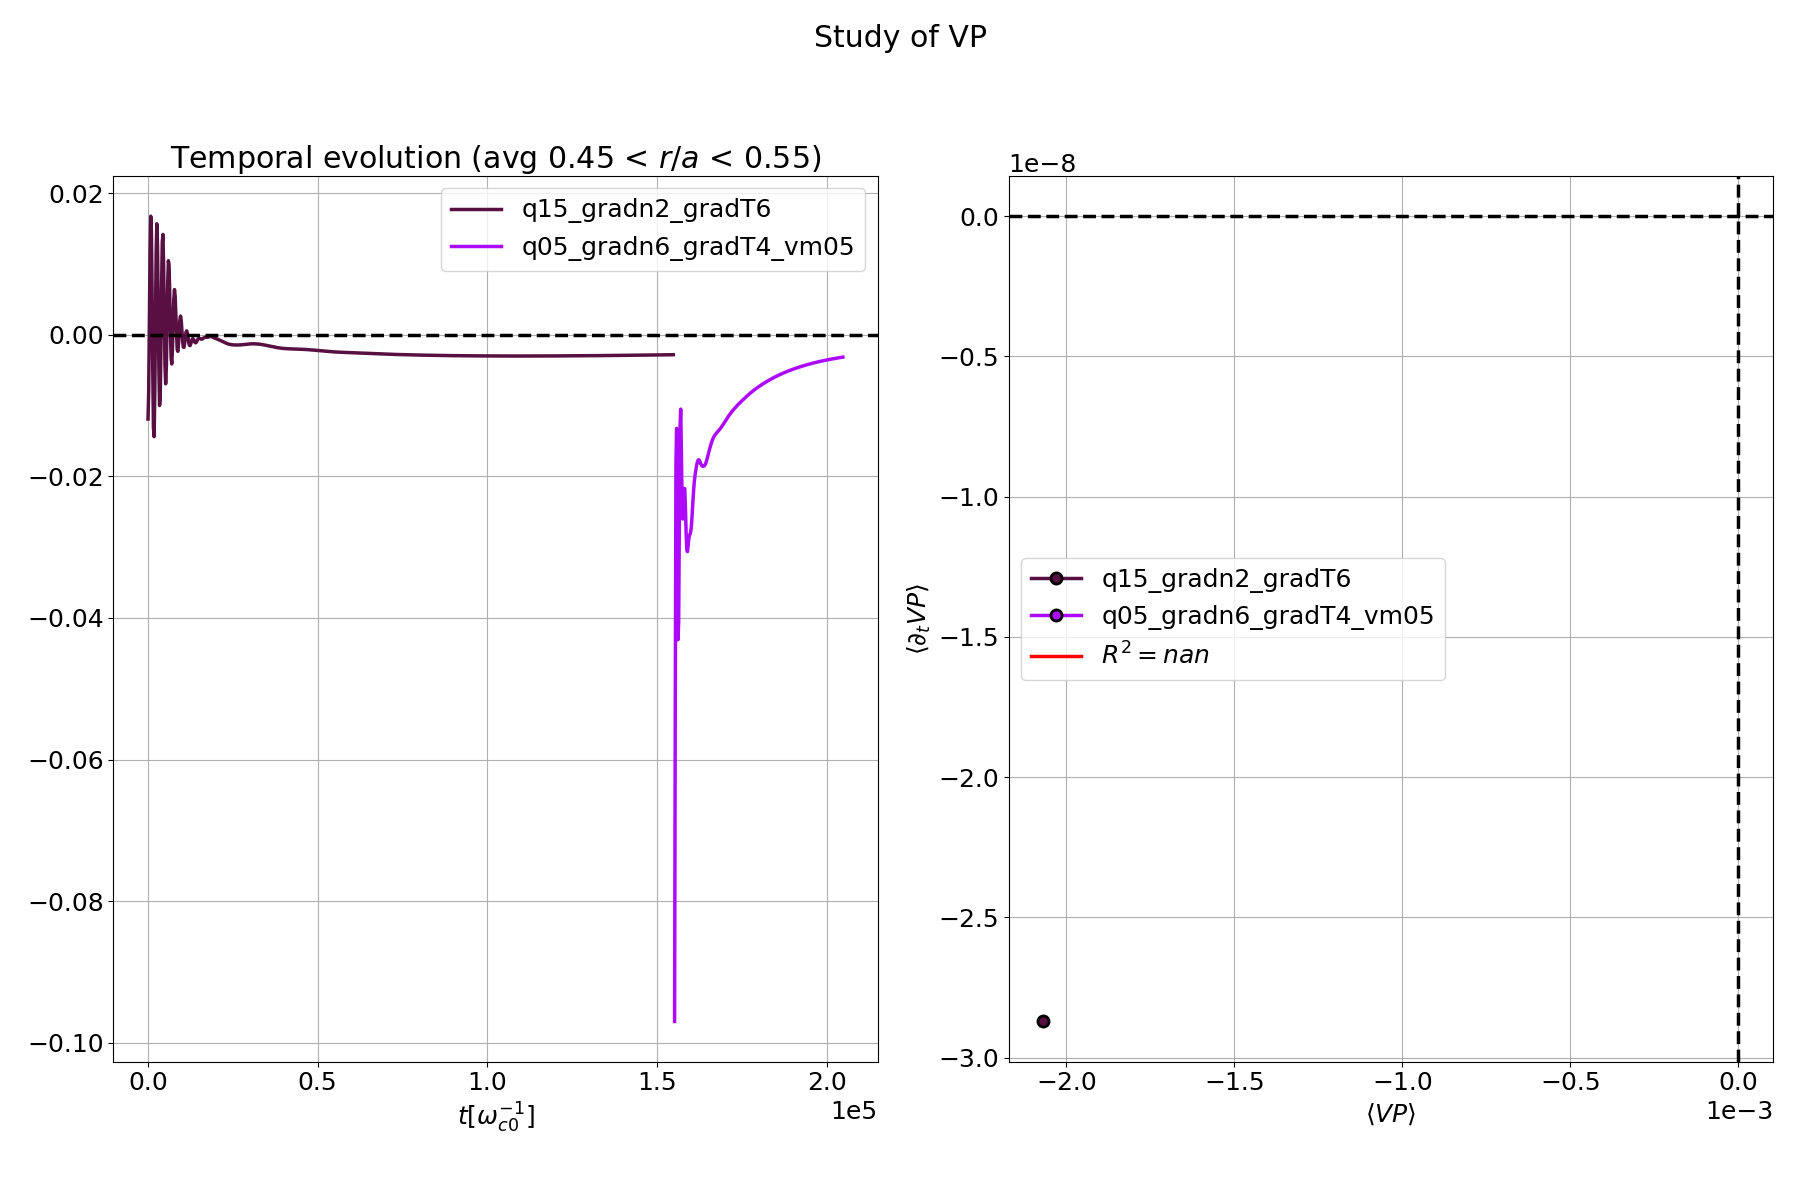

In [9]:
clear_output()
import matplotlib.gridspec as gridspec

plt.close('all')

fig = plt.figure(figsize=(18,12))

def update_plot(param,float_range_rho,float_range_time,bool_second_membre,bool_rprof,
                select_sim,dpi_adjust):

    q_ar = [q for q in all_sim if q['title'] in select_sim]
    tmin_avg  ,tmax_avg   = float_range_time
    rhomin_avg,rhomax_avg = float_range_rho

    ## Set dpi of figure
    fig.set_dpi(dpi_adjust)

    ## Clear previous plot
    fig.clf()

    nb_plots = 2 + bool_rprof
    gs = gridspec.GridSpec(1, nb_plots, figure=fig)

    ax_tevol = fig.add_subplot(gs[bool_rprof])
    ax_reg = fig.add_subplot(gs[bool_rprof+1])

    if bool_rprof:gssub = gs[0].subgridspec(len(q_ar),1)

    ## Set axes customizations
    ax_tevol.set_title(r'Temporal evolution (avg %.2f < $r/a$ < %.2f)' % (rhomin_avg , rhomax_avg) )
    fig.suptitle(r'Study of %s' %param)
    
    ## Define x and y for linear regression
    x = np.array([]); y = np.array([])

    for iq,q in enumerate(q_ar):

        itmin_avg, itmax_avg = np.searchsorted(q['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(q['rho'],[rhomin_avg,rhomax_avg])

        if bool_rprof:
            ax_rprof = fig.add_subplot(gssub[iq,0])
            ax_rprof.set_title(q['title'])
            if iq!=(len(q_ar)-1):
                ax_rprof.set_xticks([])
            else:
                ax_rprof.set_xlabel(r'$r/a$')
            ax_rprof.axvline(x=1,c='k',ls='--')
            ## Plot radial profile every 100 steps with a gradient of color
            for it in range(0,len(q['time']),30):
                c = plt.cm.RdYlBu_r(it/len(q['time']))
                ax_rprof.plot(q['rho'],q[param][it,:],c=c)
            ax_rprof.set_ylim(-0.05,0.08)

        ## Plot temporal evolution
        if not bool_second_membre:ax_tevol.plot(q['time'], np.mean( q[param][:,irhomin:irhomax],axis=1),c=q['c'],label=q['title'])
        #if not bool_second_membre:ax_tevol.plot(q['time'], SA(np.mean( q[param][:,irhomin:irhomax],axis=1),axis=0),c=q['c'],label=q['title'])
        else:ax_tevol.plot(q['time'], np.mean( q[param][:,irhomin:irhomax],axis=1) - np.mean( q[param][-1,irhomin:irhomax],axis=0),c=q['c'],label=q['title'])
        # ax_tevol.axvline(x=q['time'][itmin_avg],c='k',ls='--')
        # ax_tevol.axvline(x=q['time'][itmax_avg],c='k',ls='--')

        # if iq==0:
        #     for it,t in enumerate(q['time'][itmin_avg:itmax_avg]):
        #         ax_tevol.axvline(x=t,c='k',ls='--',alpha=0.5)

        ## Append x and y for linear regression
        if not bool_second_membre:x_to_add = np.mean(q[param][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1))
        else:x_to_add = np.mean(q[param][itmin_avg:itmax_avg,irhomin:irhomax]-q[param][itmax_avg,irhomin:irhomax],axis=(0,1))

        # x = np.append(x,np.mean(q['VP'][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1)))
        x = np.append(x,x_to_add)
        y = np.append(y,np.mean(q['dt'+param][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1)))

        ## Plot points in VP, dtVP space
        ax_reg.plot( x[-1], y[-1], c=q['c'], marker='o', label=q['title'])
        
    ## Linear regression
    print(x)
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    
    ## Plot linear regression
    ax_reg.plot(x, intercept + slope*x, 'r', label=r'$R^2 = %.2f$' % (r_value**2))
    ax_reg.set_xlabel(r'$\langle %s \rangle$' %param)
    ax_reg.set_ylabel(r'$\langle \partial_t %s \rangle$' %param)
    ax_reg.axhline(y=0,c='k',ls='--')
    ax_reg.axvline(x=0,c='k',ls='--')

    ## Axes customizations
    ax_tevol.set_xlabel(r'$t[\omega_{c0}^{-1}]$')
    ax_tevol.axhline(y=0,c='k',ls='--')
    ax_tevol.legend(); ax_reg.legend()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
float_range_time_slider = widgets.FloatRangeSlider(value=[40e3, 50e3], min=0, max=170e3, step=1000, description='Time range', layout=Layout(width='50%'), continuous_update=False)
float_range_rho_slider  = widgets.FloatRangeSlider(value=[0.45, 0.55], min=0.1, max=1.3, step=0.01, description='rho range', layout=Layout(width='50%'), continuous_update=False)

interact(update_plot, 
         float_range_time = float_range_time_slider,
         float_range_rho  = float_range_rho_slider,
         bool_second_membre = widgets.Checkbox(value=False,description='Sans second membre',disabled=False),
         bool_rprof = widgets.Checkbox(value=False,description='Plot radial profiles',disabled=False),
         **custom_widgets
        )

## <font color='springgreen'>**Travail en cours**</font> - Get $\nu_\theta$ profile

In [61]:
clear_output()
plt.close('all')

fig = plt.figure(figsize=(18,8))

bool_second_member = True

q05_bool = False
q15_bool = not q05_bool

param = 'm_Er'

if q05_bool:
    q_ar = [q05_v05, q05_v025, q05_v0, q05_vm05]
    q_ar = [q05_v1,q05_v05, q05_v025, q05_v0]
    tmin_avg  ,tmax_avg   = 37.5e3, 38e3
    fig.suptitle(r'Study of $\nu_\theta$ and $V_{neo}$ for $q_{REF} \times 0.5$')

if q15_bool:
    #q_ar=[q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_vm1_new, q15_v1_new]
    # q_ar=[q15_v0_new, q15_v05_new, q15_v025_new]
    # q_ar=[q15_vm025_new_gradT0,q15_v025_new_gradT0]
    # q_ar=[q15_v025_new_source, q15_vm025_new_source]
    q_ar =[q15_gradn2_gradT6, q15_gradn4_gradT6, q15_gradn6_gradT6, q15_gradn8_gradT6]
    tmin_avg  ,tmax_avg   = 139.5e3, 140e3
    # tmin_avg  ,tmax_avg   = 150e3, 200e3
    fig.suptitle(r'Study of $\nu_\theta$ and $V_{neo}$ for $q_{ref} \times 1.5$')

rhomin_avg,rhomax_avg = 0.15, 0.85

#x = np.array([]); y = np.array([])

for iv,v in enumerate(q_ar):
        
    itmin_avg, itmax_avg = np.searchsorted(v['time'],[tmin_avg,tmax_avg])
    irhomin, irhomax     = np.searchsorted(v['rho'],[rhomin_avg,rhomax_avg])

    if bool_second_member:x0 = np.mean(v[param][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    else:x0 = np.mean(v[param][itmin_avg:itmax_avg,irhomin:irhomax]-v[param][itmax_avg,irhomin:irhomax],axis=(0))
    y0 = np.mean(v['dt'+param][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

    if iv==0:
        x = x0[np.newaxis,:]
        y = y0[np.newaxis,:]

    ## Append x and y for linear regression
    else:
        x = np.append(x,x0[np.newaxis,:],axis=0)
        y = np.append(y,y0[np.newaxis,:],axis=0)
    
# ## Linear regression
slope_ar, intercept_ar, r_value_ar, p_value_ar, std_err_ar = (np.array([]) for i in range(5))

for ir in range(irhomax-irhomin):
    slope, intercept, r_value, p_value, std_err = linregress(x[:,ir],y[:,ir])
    slope_ar     = np.append(slope_ar,slope)
    intercept_ar = np.append(intercept_ar,intercept)
    r_value_ar   = np.append(r_value_ar,r_value)
    p_value_ar   = np.append(p_value_ar,p_value)
    std_err_ar   = np.append(std_err_ar,std_err)

nutheta_estimated = -slope_ar
Vneo_estimated    = intercept_ar/slope_ar
mui_gianakon      = np.mean(q_ar[0]['mui_Gianakon'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
nu_i              = np.mean(q_ar[0]['nu_i'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
nuneo_gianakon    = np.mean(q_ar[0]['nuneo_Gianakon'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

# inertia_factor = ((1+2*q_ar[0]['q']**2) * (q_ar[0]['eps']/q_ar[0]['q'])**2 )[irhomin:irhomax]
# inertia_factor_banana = ((1+(1.6*q_ar[0]['q']**2/np.sqrt(q_ar[0]['eps']))) * (q_ar[0]['eps']/q_ar[0]['q'])**2)[irhomin:irhomax]
inertia_factor = ((1+2*q_ar[0]['q']**2)  )[irhomin:irhomax]
inertia_factor_banana = ((1+(1.6*q_ar[0]['q']**2/np.sqrt(q_ar[0]['eps']))) )[irhomin:irhomax]
eps = q_ar[0]['eps'][irhomin:irhomax]

rho  = q_ar[0]['rho'][irhomin:irhomax]
qabs = q_ar[0]['q'][irhomin:irhomax]

xcoord = rho

ax_nutheta = fig.add_subplot(121); ax_nutheta.set_title(r'$\nu_\theta$')
# ax_nutheta.plot(xcoord,nutheta_estimated,label=r'Estimated $\nu_\theta$')
ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor,label=r'Estimated $\nu_\theta$')
ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor_banana,label=r'Estimated $\nu_\theta$')
ax_nutheta.plot(xcoord,nuneo_gianakon,label=r'Gianakon $\nu_\theta$')
# ax_nutheta.plot(xcoord,nutheta_estimated*(1+2*q_ar[0]['q'][irhomin:irhomax]**2) * q_ar[0]['eps'][irhomin:irhomax],label=r'Estimated $\nu_\theta*(1+2q^2)\varepsilon$')
# ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor,label=r'Estimated $\mu_i$')
# ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor*eps**(3/2),label=r'Estimated $\mu_i \times \varepsilon^{3/2}$')
#ax_nutheta.plot(xcoord,nutheta_estimated*(1+q_ar[0]['q'][irhomin:irhomax]**2) * (q_ar[0]['eps'][irhomin:irhomax]/q_ar[0]['q'][irhomin:irhomax])**2,label=r'Estimated $\nu_\theta*(1+q^2)\varepsilon$')
# ax_nutheta.plot(xcoord,mui_gianakon,label=r'Gianakon $\mu_i$')
# ax_nutheta.plot(xcoord,mui_gianakon* (q_ar[0]['q'][irhomin:irhomax]/q_ar[0]['eps'][irhomin:irhomax])**2,label=r'Gianakon $\mu_i \times \left( q/\varepsilon \right)^2 $')
# ax_nutheta.plot(xcoord,nu_i,label=r'$\nu_i$')
if xcoord[0]==rho[0]:ax_nutheta.set_xlabel(r'$r/a$')
else:ax_nutheta.set_xlabel(r'$q$')

ax_vneo = fig.add_subplot(122); ax_vneo.set_title(r'$V_{neo}$')
ax_vneo.plot(q_ar[0]['rho'][irhomin:irhomax],Vneo_estimated,label=r'Estimated $V_{neo}$')

## Fill a x zone with a color where the R^2 is above a threshold
lim = 0.8
for axes in [ax_nutheta,ax_vneo]:
    ymin = axes.get_ylim()[0]
    ymax = axes.get_ylim()[1]
    axes.fill_between(q_ar[0]['rho'][irhomin:irhomax],ymin,ymax,where=r_value_ar**2<lim,color='grey',alpha=0.5,label=r'$R^2<%.2f$'%lim)
    axes.legend()
    
    axes.axhline(y=0,c='k',ls='--')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## <font color='springgreen'>**Travail en cours**</font> - Compare $\nu_\theta$ profiles

In [27]:
plt.close('all')

fig = plt.figure(figsize=(18,8))

ax_nutheta = fig.add_subplot(121)#; ax_nutheta.set_title(r'$\nu_\theta$')
ax_3d = fig.add_subplot(122,projection='3d')
#ax_vneo = fig.add_subplot(133); ax_vneo.set_title(r'$V_{neo}$')


bool_second_member = False

q05_bool = False
q15_bool = not q05_bool


q05_ar = [q05_v05, q05_v025, q05_v0, q05_vm05]
tmin_05  ,tmax_05   = 40e3, 50e3

q15_ar=[q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_vm1_new, q15_v1_new]
tmin_15  ,tmax_15   = 135e3, 145e3

rhomin_avg,rhomax_avg = 0.15, 0.85

#VP_x = np.array([]); dtVP_y = np.array([])

color1_05 = 'xkcd:blue'
color2_05 = 'xkcd:light blue'
color1_15 = 'xkcd:red'
color2_15 = 'xkcd:light red'

for q_ar,tmin_avg,tmax_avg,c1,c2,title in zip([q05_ar,q15_ar],[tmin_05,tmin_15],[tmax_05,tmax_15],[color1_05,color1_15],[color2_05,color2_15],['q=0.5','q=1.5']):
    for iv,v in enumerate(q_ar):
            
        itmin_avg, itmax_avg = np.searchsorted(v['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(v['rho'],[rhomin_avg,rhomax_avg])

        if   bool_second_member:VP_x0 = np.mean(v['VP'][itmin_avg:itmax_avg,:],axis=0)
        else:VP_x0                    = np.mean(v['VP'][itmin_avg:itmax_avg,:]-v['VP'][itmax_avg,:],axis=(0))
        dtVP_y0                  = np.mean(v['dtVP'][itmin_avg:itmax_avg,:],axis=0)

        if iv==0:
            VP_x = VP_x0[np.newaxis,:]
            dtVP_y = dtVP_y0[np.newaxis,:]

        ## Append VP_x and dtVP_y for linear regression
        else:
            VP_x = np.append(VP_x,VP_x0[np.newaxis,:],axis=0)
            dtVP_y = np.append(dtVP_y,dtVP_y0[np.newaxis,:],axis=0)
        
    # ## Linear regression
    slope_ar, intercept_ar, r_value_ar, p_value_ar, std_err_ar = (np.array([]) for i in range(5))

    for ir in range(VP_x.shape[1]):
        slope, intercept, r_value, p_value, std_err = linregress(VP_x[:,ir],dtVP_y[:,ir])
        slope_ar     = np.append(slope_ar,slope)
        intercept_ar = np.append(intercept_ar,intercept)
        r_value_ar   = np.append(r_value_ar,r_value)
        p_value_ar   = np.append(p_value_ar,p_value)
        std_err_ar   = np.append(std_err_ar,std_err)

    nutheta_estimated = -slope_ar[irhomin:irhomax]
    Vneo_estimated    = (intercept_ar/slope_ar)[irhomin:irhomax]
    mui_gianakon      = np.mean(q_ar[0]['nutheta_Gianakon'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    nu_i              = np.mean(q_ar[0]['nu_i'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

    inertia_factor = ((1+2*q_ar[0]['q']**2) * (q_ar[0]['eps']/q_ar[0]['q'])**2 )[irhomin:irhomax]
    inertia_factor_arbitrary = ((1+2*q_ar[0]['q']**2) * (q_ar[0]['eps']/q_ar[0]['q'])**2 * q_ar[0]['eps']**(3/2))[irhomin:irhomax]
    inertia_factor_banana = ((1+(1.6*q_ar[0]['q']**2/np.sqrt(q_ar[0]['eps']))) * (q_ar[0]['eps']/q_ar[0]['q'])**2)[irhomin:irhomax]

    eps = q_ar[0]['eps'][irhomin:irhomax]

    rho    = q_ar[0]['rho'][irhomin:irhomax]
    qabs   = q_ar[0]['q'][irhomin:irhomax]
    nustar = np.mean(q_ar[0]['nustar'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

    xcoord = rho

    ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor,label=title + r' - Estimated $\mu_i$',color=c1)
    #ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor_arbitrary,label=title + r' - Estimated $\mu_i \times \varepsilon^{3/2}$',color=c1)
    #ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor_banana,label=title + r' - Estimated $\mu_i$ (banana)',color=c1)
    #ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor*eps**(3/2),label=r'Estimated $\mu_i \times \varepsilon^{3/2}$',color=c1)
    ax_nutheta.plot(xcoord,mui_gianakon/(0.452*np.sqrt(eps)),label=r'Gianakon $\mu_i$',color=c2)
    ax_nutheta.plot(xcoord,nu_i,label=r'$\nu_i$',color=c1,ls='--')
    if xcoord[0]==rho[0]:ax_nutheta.set_xlabel(r'$r/a$')
    if xcoord[0]==qabs[0]:ax_nutheta.set_xlabel(r'$q$')
    if xcoord[0]==nustar[0]:ax_nutheta.set_xlabel(r'$\nu^\star$')
    if xcoord[0]==(nustar*eps)[0]:ax_nutheta.set_xlabel(r'$\nu^\star \times \varepsilon$')

    #ax_vneo.plot(q_ar[0]['rho'][irhomin:irhomax],Vneo_estimated,label=r'Estimated $V_{neo}$')

    ## Plot the plane (nutheta,nustar,q)
    ax_3d.plot(nutheta_estimated*inertia_factor,nustar*eps,qabs,label=r'$\nu_\theta$',c=c1)
    #ax_3d.plot(mui_gianakon,nustar,qabs,label=r'$\mu_i$',c=c2)
    ax_3d.set_xlabel(r'$\nu_\theta$')
    ax_3d.set_ylabel(r'$\nu^\star \times \varepsilon$')
    ax_3d.set_zlabel(r'$q$')
    
## Fill a x zone with a color where the R^2 is above a threshold
lim = 0.9
for axes in [ax_nutheta]:
    ymin = axes.get_ylim()[0]
    ymax = axes.get_ylim()[1]
    axes.fill_between(q_ar[0]['rho'][irhomin:irhomax],ymin,ymax,where=r_value_ar[irhomin:irhomax]**2<lim,color='grey',alpha=0.5,label=r'$R^2<%.2f$'%lim)
    axes.legend()
    
    axes.axhline(y=0,c='k',ls='--')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

KeyError: 'nutheta_Gianakon'

## <font color='springgreen'>**Travail en cours**</font> - Plot radial profiles

interactive(children=(Text(value='VP', continuous_update=False, description='Select parameter:', placeholder='…

<function __main__.update_plot2(param, float_range_time, select_sim, dpi_adjust)>

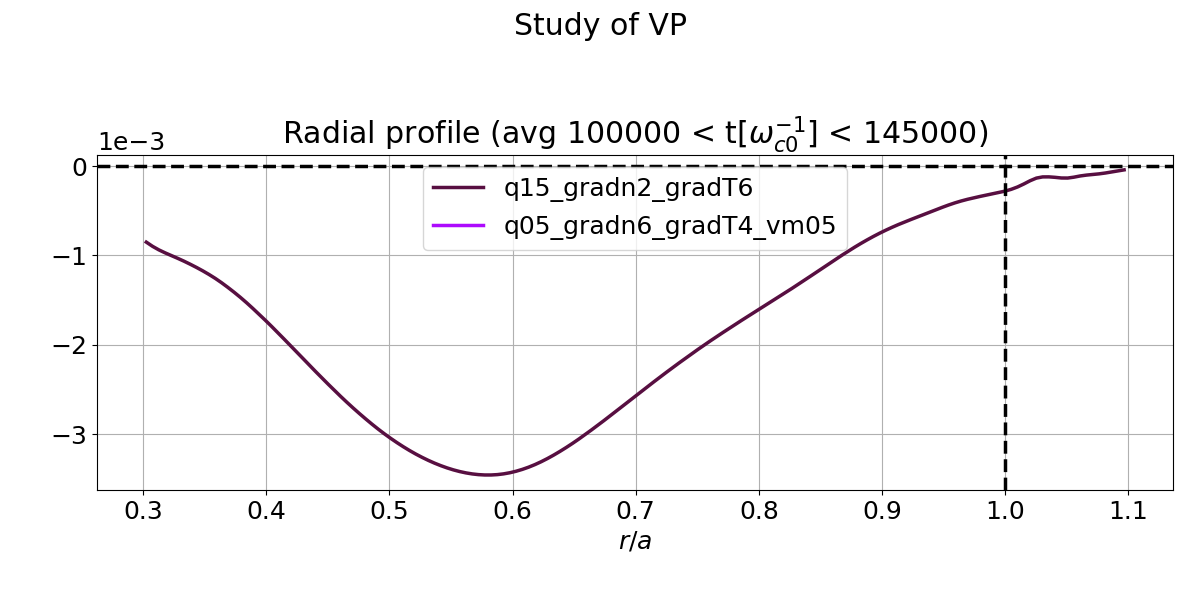

In [5]:
clear_output()

fig = plt.figure(figsize=(12,6))
ax_rprof = fig.add_subplot(111)

def update_plot2(param,float_range_time,
                select_sim,dpi_adjust):

    q_ar = [q for q in all_sim if q['title'] in select_sim]
    tmin_avg,tmax_avg = float_range_time
    
    color1 = 'xkcd:cerulean'
    color2 = 'xkcd:reddish orange'

    ## Set dpi of figure
    fig.set_dpi(dpi_adjust)

    ## Clear previous plot
    ax_rprof.clear()

    ## Set axes customizations
    ax_rprof.set_title(r'Radial profile (avg %.0f < t$[\omega_{c0}^{-1}]$ < %.0f)' % (tmin_avg , tmax_avg) )
    fig.suptitle(r'Study of %s' %param)
    
    for q in q_ar:

        itmin_avg, itmax_avg = np.searchsorted(q['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(q['rho'],[0.3,1.1])

        ax_rprof.plot(q['rho'][irhomin:irhomax], np.mean( q[param][itmin_avg:itmax_avg,irhomin:irhomax],axis=0),c=q['c'],label=q['title'])
        
        
    ## Axes customizations
    ax_rprof.set_xlabel(r'$r/a$')
    ax_rprof.axhline(y=0,c='k',ls='--')
    ax_rprof.axvline(x=1,c='k',ls='--')
    ax_rprof.legend()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
float_range_time_slider = widgets.FloatRangeSlider(value=[100e3, 145e3], min=0, max=250e3, step=1000, description='Time range', layout=Layout(width='50%'), continuous_update=False)

interact(update_plot2, 
         float_range_time = float_range_time_slider,
         **custom_widgets
        )

## <font color='springgreen'>**Travail en cours**</font> - Comparaison flux-driven / gradient-driven

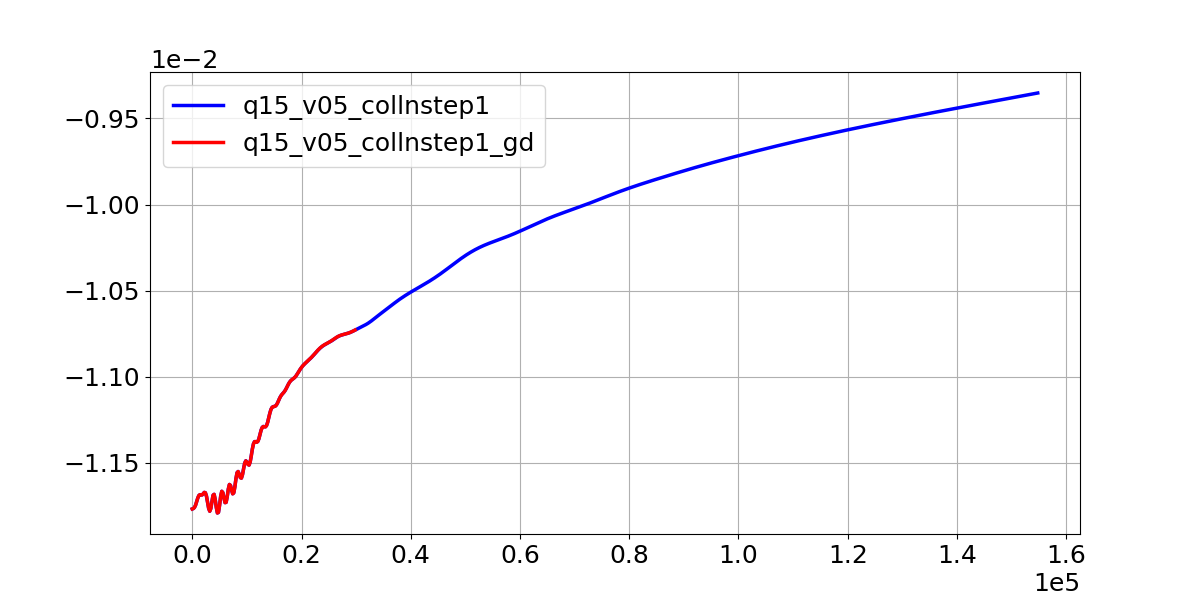

In [37]:
q15_v05_fluxdriven      = load_qprof_dict("data/q15_neo_v05_collnstep1_nmu64.hdf5"                , 'q15_v05_collnstep1'     , 'b' , title_fancy=r'$V_{\parallel 0} = 0.5 - Flux-driven$' )
q15_v05_gradientdriven  = load_qprof_dict("data/q15_neo_v05_collnstep1_nmu64_gradientdriven.hdf5" , 'q15_v05_collnstep1_gd'  , 'r' , title_fancy=r'$V_{\parallel 0} = 0.5$ - Gradient-driven' )

fig = plt.figure(figsize=(12,6))
ax_tevol = fig.add_subplot(111)

for q in [q15_v05_fluxdriven,q15_v05_gradientdriven]:
    irho = np.searchsorted(q['rho'],0.5)
    ax_tevol.plot(q['time'], q['drT'][:,irho],c=q['c'],label=q['title'])
ax_tevol.legend()

#ax_rprof = fig.add_subplot(212)

## <font color='red'>**Résultat**</font> - Impact du paramètre "coll_nstep" [▲](#sommaire)

In [ ]:
plt.close('all')

fig = plt.figure(figsize=(20,12))

for q in [q15_v1_new, q15_v05_new, q15_v025_new, q15_v0_new, q15_vm05_new, q15_vm1_new]:
    q['alpha'] = 1
    q['lw'] = 3
for q in [q15_v1, q15_v05, q15_v025, q15_v0, q15_vm05, q15_vm1]:
    q['alpha'] = 0.75
    q['lw'] = 2

q_ar_collnstep5 = [q15_v1, q15_v05, q15_v025, q15_v0, q15_vm05, q15_vm1]
q_ar_collnstep1 = [q15_v1_new, q15_v05_new, q15_v025_new, q15_v0_new, q15_vm05_new, q15_vm1_new]

gs = gridspec.GridSpec(1, 2, figure=fig)

def update_plot(float_range_rho,dpi_adjust):

    rhomin_avg,rhomax_avg = float_range_rho

    ## Set dpi of figure
    fig.set_dpi(dpi_adjust)

    ## Clear previous plot
    fig.clf()

    ax_tevol = fig.add_subplot(gs[0]); ax_tevol.set_title(r'$V_P$')

    gssub = gs[1].subgridspec(len(q_ar_collnstep1[::2]),1)

    #ax_tevol2 = fig.add_subplot(122); ax_tevol2.set_title(r'$\partial_t V_P$')

    ## Set axes customizations
    fig.suptitle(r'Temporal evolution (avg %.2f < $r/a$ < %.2f)' % (rhomin_avg , rhomax_avg) )

    for iq,q in enumerate(zip(q_ar_collnstep1[::2],q_ar_collnstep5[::2])):

        irhomin, irhomax     = np.searchsorted(q[0]['rho'],[rhomin_avg,rhomax_avg])

        ## Plot temporal evolution
        ax_tevol.plot(q[0]['time'], np.mean( q[0]['VP'][:,irhomin:irhomax],axis=1),c=q[0]['c'],ls=q[0]['ls'],label=q[0]['title'])
        ax_tevol.plot(q[1]['time'], np.mean( q[1]['VP'][:,irhomin:irhomax],axis=1),c=q[1]['c'],ls=q[1]['ls'],label=q[1]['title'])

        it_plot = np.searchsorted(q[0]['time'],0.8e5)

        ax_tevol2 = fig.add_subplot(gssub[iq,0]); ax_tevol2.set_title(r'$\partial_t V_P$ - ' + q[0]['title'][:-11])
        ax_tevol2.plot(q[1]['time'][it_plot:], np.mean( q[1]['dtVP'][it_plot:,irhomin:irhomax],axis=1),c='b',ls=q[1]['ls'],lw=q[1]['lw'],alpha=q[1]['alpha'],label=q[1]['title'])
        ax_tevol2.plot(q[0]['time'][it_plot:], np.mean( q[0]['dtVP'][it_plot:,irhomin:irhomax],axis=1),c='r',ls=q[0]['ls'],lw=q[0]['lw'],alpha=q[0]['alpha'],label=q[0]['title'])
        if iq!=(len(q_ar_collnstep1[::2])-1): ax_tevol2.set_xticks([])
        else: ax_tevol2.set_xlabel(r'$t[\omega_{c0}^{-1}]$')

    ## Axes customizations
    ax_tevol.set_xlabel(r'$t[\omega_{c0}^{-1}]$')

    ## List legend elements in custom column
    handles, labels = ax_tevol.get_legend_handles_labels()
    custom_handles = np.concatenate((handles[::2], handles[1::2]))
    custom_labels = np.concatenate((labels[::2], labels[1::2]))
    ax_tevol.legend(custom_handles, custom_labels, ncol=2)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

float_range_rho_slider  = widgets.FloatRangeSlider(value=[0.45, 0.55], min=0.1, max=1.3, step=0.01, description='rho range', layout=Layout(width='50%'), continuous_update=False)

interact(update_plot, 
         float_range_rho  = float_range_rho_slider,
         dpi_adjust = widgets.IntSlider(min=30, max=200, step=1,value=dpi_custom, continuous_update=False)
        )

## <font color='red'>**Résultat**</font> - $\mu_i$ Gianakon dans les simulations

In [ ]:
import matplotlib.cm as cm

plt.close('all')

rho = q05_v1['rho']
qprof05 = q05_v1['q']
qprof15 = q15_v1['q']

q05_ar = [q05_v05, q05_v025, q05_v0, q05_vm05, q05_vm1, q05_v1]
q15_ar = [q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_vm1_new, q15_v1_new]

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(221)
# Create a color gradient array based on a colormap
colors_q05 = cm.winter(np.linspace(0, 1, len(q05_ar)))
colors_q15 = cm.autumn(np.linspace(0, 1, len(q15_ar)))

ax.set_xlabel(r'$r/a$')
ax.set_title(r'$\nu^\star$')

ax2 = fig.add_subplot(222)

ax2.set_xlabel(r'$r/a$')
ax2.set_title(r'$\mu_i$')

ax3 = fig.add_subplot(223)

ax3.set_xlabel(r'$r/a$')
ax3.set_title(r'$\Pi$')

ax4 = fig.add_subplot(224)

ax4.set_xlabel(r'$r/a$')
ax4.set_title(r'$\nabla T$')

for iq,q in enumerate(q05_ar):
    ax.plot(rho,q['nustar'][-1,:],label=r'$\nu^\star$',c=colors_q05[iq])
    ax2.plot(rho,q['nutheta_Gianakon'][-1,:],label=r'$\nu_\theta$',c=colors_q05[iq])
    ax3.plot(rho,q['RSpol'][-1,:],label=r'$\Pi$',c=colors_q05[iq])
    ax4.plot(rho,q['RSpol'][-1,:],label=r'$\nabla T$',c=colors_q05[iq])
for iq,q in enumerate(q15_ar):    
    ax.plot(rho,q['nustar'][-1,:],label=r'$\nu^\star$',c=colors_q15[iq])
    ax2.plot(rho,q['nutheta_Gianakon'][-1,:],label=r'$\nu_\theta$',c=colors_q15[iq])
    ax3.plot(rho,q['RSpol'][-1,:],label=r'$\Pi$',c=colors_q15[iq])
    ax4.plot(rho,q['drT'][-1,:],label=r'$\nabla T$',c=colors_q15[iq])


## <font color='red'>**Résultat**</font> - <font color='lime'>**(Papier)**</font>  Evolution de $V_E$ et droite dans l'espace $(V_E, \partial_r V_E)$ - $q_{ref} \times 1.5$

interactive(children=(FloatRangeSlider(value=(0.45, 0.55), continuous_update=False, description='rho range', l…

<function __main__.update_plot(float_range_rho, bool_second_membre, bool_rprof, dpi_adjust)>

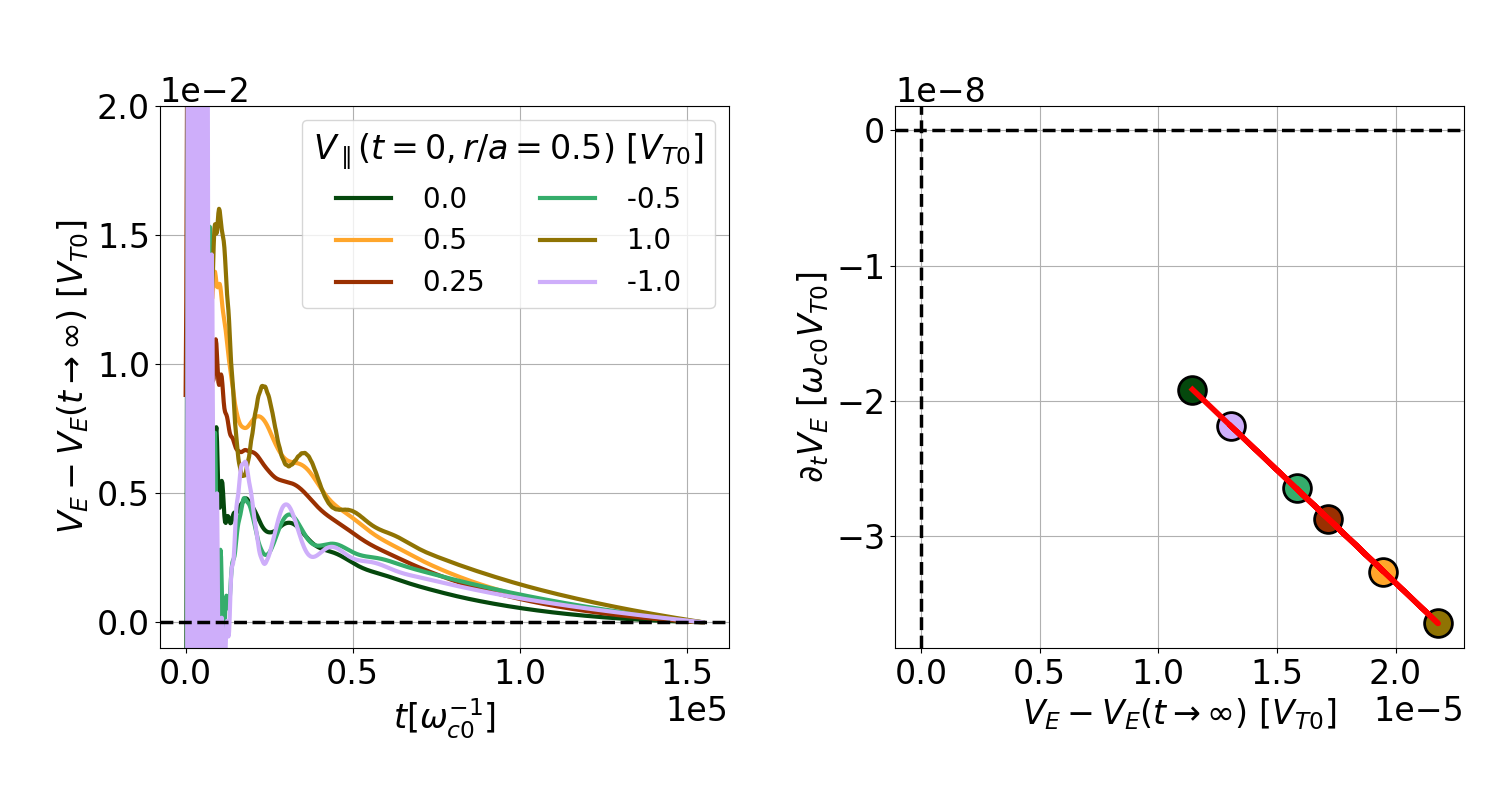

In [16]:
import matplotlib.gridspec as gridspec
plt.rc('font',size=24)

plt.close('all')

q_ar = [q15_v0_new,q15_v05_new,q15_v025_new,q15_vm05_new,q15_v1_new,q15_vm1_new]

fig = plt.figure(figsize=(15,8))

def update_plot(float_range_rho,bool_second_membre,bool_rprof,
                dpi_adjust):

    rhomin_avg,rhomax_avg = float_range_rho

    ## Set dpi of figure
    fig.set_dpi(dpi_adjust)

    ## Clear previous plot
    fig.clf()

    nb_plots = 2 + bool_rprof
    gs = gridspec.GridSpec(1, nb_plots, figure=fig)

    ax_tevol = fig.add_subplot(gs[bool_rprof])
    ax_reg = fig.add_subplot(gs[bool_rprof+1])

    ## Define VP_x and dtVP_y for linear regression
    VE_x = np.array([]); dtVP_y = np.array([])

    for iq,q in enumerate(q_ar):

        itmin_avg, itmax_avg = np.searchsorted(q['time'],[100e3,101e3])
        irhomin, irhomax     = np.searchsorted(q['rho'],[rhomin_avg,rhomax_avg])

        ## Plot temporal evolution
        if not bool_second_membre:ax_tevol.plot(q['time'], np.mean( q['m_Er'][:,irhomin:irhomax],axis=1),c=q['c'],label=q['title_fancy'][2:],lw=3)
        else:ax_tevol.plot(q['time'], np.mean( q['m_Er'][:,irhomin:irhomax],axis=1) - np.mean( q['m_Er'][-1,irhomin:irhomax],axis=0),c=q['c'],label=q['title_fancy'][18:-1],lw=3)
        ## Append VE_x and dtVP_y for linear regression
        if not bool_second_membre:VE_x_to_add = np.mean(q['m_Er'][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1))
        else:VE_x_to_add = np.mean(q['m_Er'][itmin_avg:itmax_avg,irhomin:irhomax]-q['m_Er'][itmax_avg,irhomin:irhomax],axis=(0,1))

        # VE_x = np.append(VE_x,np.mean(q['VP'][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1)))
        VE_x = np.append(VE_x,VE_x_to_add)
        dtVP_y = np.append(dtVP_y,np.mean(q['m_dtEr'][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1)))

        ## Plot points in VP, dtVP space
        ax_reg.plot( VE_x[-1], dtVP_y[-1], c=q['c'], marker='o', markersize=20)
        
    ## Linear regression
    print(VE_x)
    slope, intercept, r_value, p_value, std_err = linregress(VE_x,dtVP_y)
    
    ## Plot linear regression
    ax_reg.plot(VE_x, intercept + slope*VE_x, 'r', lw=4, ls='-')
    ax_reg.set_xlabel(r'$V_E - V_E(t\rightarrow \infty) ~ [V_{T0}]$')
    ax_reg.set_ylabel(r'$\partial_t V_E ~ [\omega_{c0} V_{T0}]$')
    ax_reg.axhline(y=0,c='k',ls='--')
    ax_reg.axvline(x=0,c='k',ls='--')

    ## Axes customizations
    ax_tevol.set_xlabel(r'$t[\omega_{c0}^{-1}]$')
    ax_tevol.axhline(y=0,c='k',ls='--')
    ax_tevol.legend(ncol=2,fontsize=20,title=r'$V_\parallel(t=0,r/a=0.5) ~ [V_{T0}]$')
    ax_tevol.set_ylabel(r'$V_E - V_E(t\rightarrow \infty) ~ [V_{T0}]$')
    ax_tevol.set_ylim(-0.1e-2,2e-2)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
float_range_rho_slider  = widgets.FloatRangeSlider(value=[0.45, 0.55], min=0.1, max=1.3, step=0.01, description='rho range', layout=Layout(width='50%'), continuous_update=False)

interact(update_plot, 
         float_range_rho  = float_range_rho_slider,
         bool_second_membre = widgets.Checkbox(value=True,description='Sans second membre',disabled=False),
         bool_rprof = widgets.Checkbox(value=False,description='Plot radial profiles',disabled=False),
         **custom_widgets
        )

## <font color='red'>**Résultat**</font> - <font color='lime'>**(Papier)**</font> Profil estimé de $\nu_\theta$

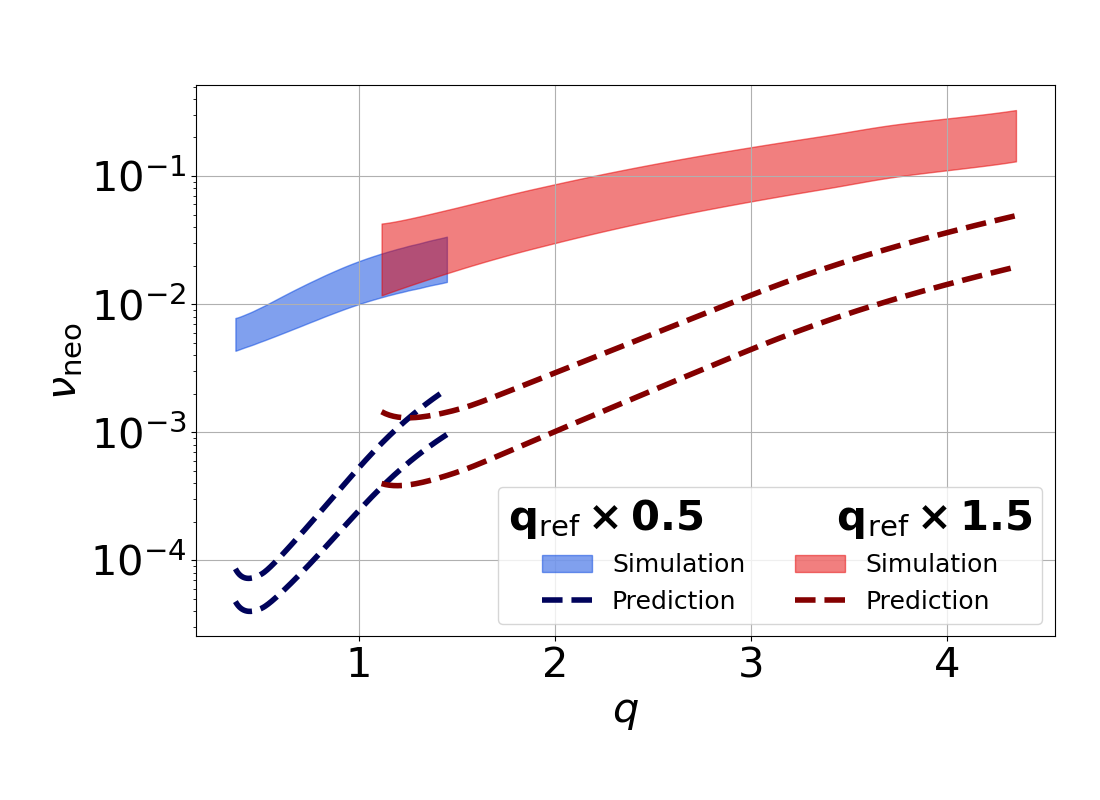

In [17]:
plt.rc('font',size=30)
plt.close('all')

fig = plt.figure(figsize=(11,8))

fig.set_dpi(dpi_custom)

ax_nutheta = fig.add_subplot(111)
bool_second_member = False

q05_bool = False
q15_bool = not q05_bool


q05_ar = [q05_v05, q05_v025, q05_v0, q05_vm05]
tmin_05  ,tmax_05   = 40e3, 50e3
tmin_05  ,tmax_05   = 49.5e3, 50e3

q15_ar=[q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_vm1_new, q15_v1_new]
tmin_15  ,tmax_15   = 125e3, 135e3
tmin_15  ,tmax_15   = 134.5e3, 135e3

rhomin_avg,rhomax_avg = 0.15, 0.85

#VP_x = np.array([]); dtVP_y = np.array([])

color1_05 = 'xkcd:blue'
color2_05 = 'xkcd:dark blue'
color1_15 = 'xkcd:red'
color2_15 = 'xkcd:dark red'

for q_ar,tmin_avg,tmax_avg,c1,c2,title in zip([q05_ar,q15_ar],[tmin_05,tmin_15],[tmax_05,tmax_15],[color1_05,color1_15],[color2_05,color2_15],[r'$q_{\rm ref} \times 0.5$',r'$q_{\rm ref} \times 1.5$']):
    for iv,v in enumerate(q_ar):
            
        itmin_avg, itmax_avg = np.searchsorted(v['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(v['rho'],[rhomin_avg,rhomax_avg])

        if   bool_second_member:VE_x0 = np.mean(v['m_Er'][itmin_avg:itmax_avg,:],axis=0)
        else:VE_x0                    = np.mean(v['m_Er'][itmin_avg:itmax_avg,:]-v['m_Er'][itmax_avg,:],axis=(0))
        dtVE_y0                  = np.mean(v['m_dtEr'][itmin_avg:itmax_avg,:],axis=0)

        if iv==0:
            VE_x = VE_x0[np.newaxis,:]
            dtVE_y = dtVE_y0[np.newaxis,:]

        ## Append VP_x and dtVP_y for linear regression
        else:
            VE_x = np.append(VE_x,VE_x0[np.newaxis,:],axis=0)
            dtVE_y = np.append(dtVE_y,dtVE_y0[np.newaxis,:],axis=0)
        
    # ## Linear regression
    slope_ar, intercept_ar, r_value_ar, p_value_ar, std_err_ar = (np.array([]) for i in range(5))

    for ir in range(VE_x.shape[1]):
        slope, intercept, r_value, p_value, std_err = linregress(VE_x[:,ir],dtVE_y[:,ir])
        slope_ar     = np.append(slope_ar,slope)
        intercept_ar = np.append(intercept_ar,intercept)
        r_value_ar   = np.append(r_value_ar,r_value)
        p_value_ar   = np.append(p_value_ar,p_value)
        std_err_ar   = np.append(std_err_ar,std_err)

    rho         = q_ar[0]['rho'][irhomin:irhomax]
    eps         = q_ar[0]['eps'][irhomin:irhomax]
    qabs        = q_ar[0]['q'][irhomin:irhomax]
    nustar      = np.mean(q_ar[0]['nustar'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    q_on_eps_sq = (qabs/eps)**2

    nutheta_estimated = -slope_ar[irhomin:irhomax]
    Vneo_estimated    = (intercept_ar/slope_ar)[irhomin:irhomax]
    mui_gianakon      = np.mean(q_ar[0]['nutheta_Gianakon'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    nu_i              = np.mean(q_ar[0]['nu_i'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    nutheta_gianakon  = mui_gianakon*q_on_eps_sq

    rho    = q_ar[0]['rho'][irhomin:irhomax]
    qabs   = q_ar[0]['q'][irhomin:irhomax]
    nustar = np.mean(q_ar[0]['nustar'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

    inertia_factor = 1+2*qabs**2
    inertia_factor_banana = 1 + 2*qabs**2 + (1.6*qabs**2/np.sqrt(eps) ) 

    xcoord = qabs

    # ax_nutheta.semilogy(xcoord,nutheta_estimated*inertia_factor,label=title + r' - Estimated $\nu_{\rm neo}$',color=c1)
    # ax_nutheta.semilogy(xcoord,nutheta_estimated*inertia_factor_banana,label=title + r' - banana Estimated $\nu_{\rm neo}$',color=c1,ls='--')

    ax_nutheta.fill_between(xcoord,nutheta_estimated*inertia_factor_banana,nutheta_estimated*inertia_factor,color=c1,alpha=0.5,label='Simulation')

    #ax_nutheta.fill_between(xcoord,nutheta_estimated*inertia_factor_banana*nustar,nutheta_estimated*inertia_factor*nustar,color=c1,alpha=0.5,label='Simulation')

    ax_nutheta.plot(xcoord,nutheta_gianakon*inertia_factor_banana,label=r'Prediction',color=c2,ls='--',lw=4)
    ax_nutheta.plot(xcoord,nutheta_gianakon*inertia_factor,color=c2,ls='--',lw=4)
    
    
    ## set log scale
    ax_nutheta.set_yscale('log')

    ax_nutheta.set_ylabel(r'$\nu_{\rm neo}$')

    if xcoord[0]==rho[0]:ax_nutheta.set_xlabel(r'$r/a$')
    if xcoord[0]==qabs[0]:ax_nutheta.set_xlabel(r'$q$')
    if xcoord[0]==nustar[0]:ax_nutheta.set_xlabel(r'$\nu^\star$')
    if xcoord[0]==(nustar*eps)[0]:ax_nutheta.set_xlabel(r'$\nu^\star \times \varepsilon$')

    ax_nutheta.legend(ncol=2, title=r'$\mathbf{q_{\rm ref} \times 0.5}$          $\mathbf{q_{\rm ref} \times 1.5}$',fontsize=18,loc='lower right')
    ##


#     axes.axhline(y=0,c='k',ls='--')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## <font color='red'>**Résultat**</font> - <font color='lime'>**(Temporaire/Papier)**</font> Profil estimé de $\nu_\theta$

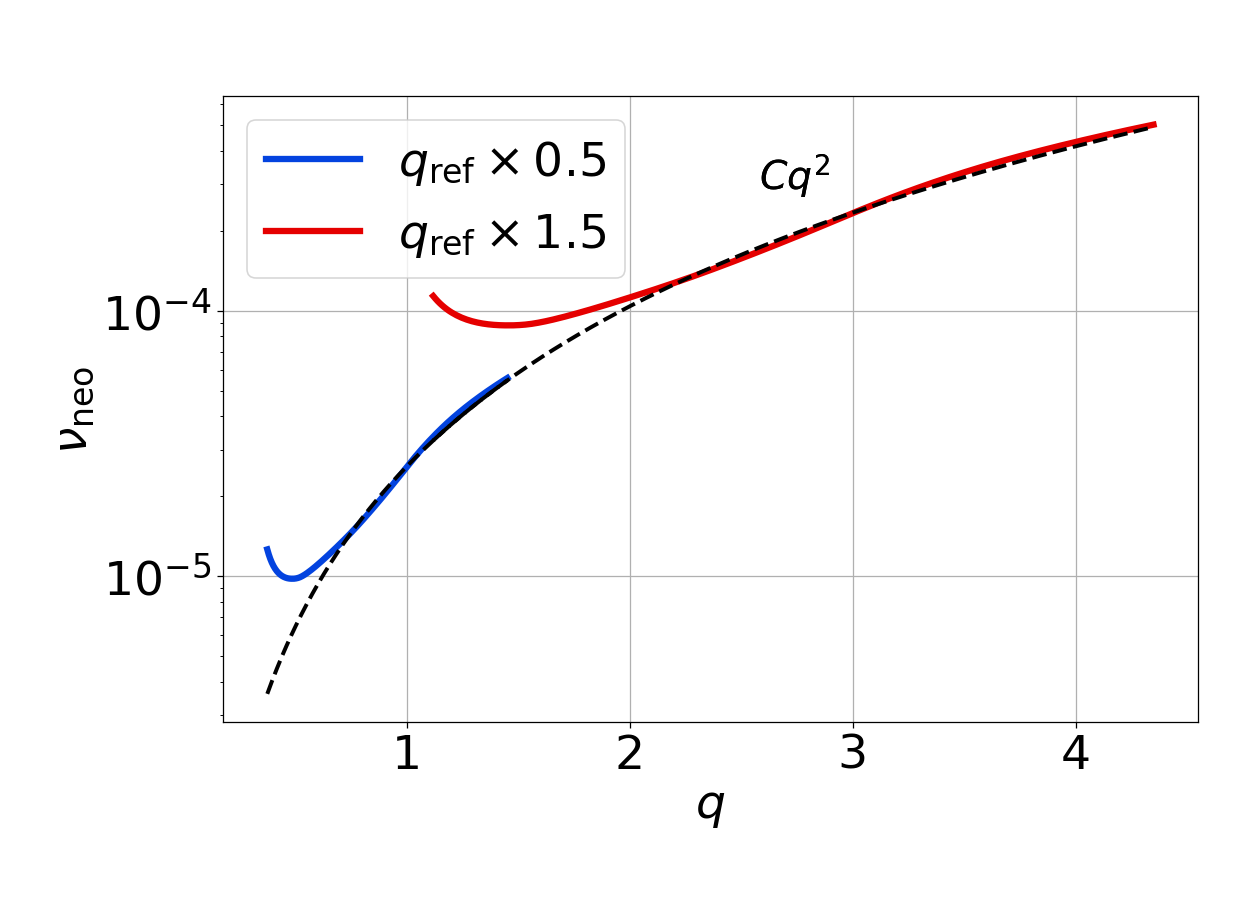

In [18]:
plt.rc('font',size=30)
plt.close('all')

fig = plt.figure(figsize=(11,8))

fig.set_dpi(dpi_custom)

ax_nutheta = fig.add_subplot(111)
bool_second_member = False

q05_bool = False
q15_bool = not q05_bool


q05_ar = [q05_v05, q05_v025, q05_v0, q05_vm05]
tmin_05  ,tmax_05   = 49.5e3, 50e3

q15_ar=[q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_vm1_new, q15_v1_new]
tmin_15  ,tmax_15   = 134.5e3, 135e3

rhomin_avg,rhomax_avg = 0.15, 0.85

#VP_x = np.array([]); dtVP_y = np.array([])

color1_05 = 'xkcd:blue'
color2_05 = 'xkcd:dark blue'
color1_15 = 'xkcd:red'
color2_15 = 'xkcd:dark red'

for q_ar,tmin_avg,tmax_avg,c1,c2,title in zip([q05_ar,q15_ar],[tmin_05,tmin_15],[tmax_05,tmax_15],[color1_05,color1_15],[color2_05,color2_15],[r'$q_{\rm ref} \times 0.5$',r'$q_{\rm ref} \times 1.5$']):
    for iv,v in enumerate(q_ar):
            
        itmin_avg, itmax_avg = np.searchsorted(v['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(v['rho'],[rhomin_avg,rhomax_avg])

        if   bool_second_member:VE_x0 = np.mean(v['m_Er'][itmin_avg:itmax_avg,:],axis=0)
        else:VE_x0                    = np.mean(v['m_Er'][itmin_avg:itmax_avg,:]-v['m_Er'][itmax_avg,:],axis=(0))
        dtVE_y0                  = np.mean(v['m_dtEr'][itmin_avg:itmax_avg,:],axis=0)

        if iv==0:
            VE_x = VE_x0[np.newaxis,:]
            dtVE_y = dtVE_y0[np.newaxis,:]

        ## Append VP_x and dtVP_y for linear regression
        else:
            VE_x = np.append(VE_x,VE_x0[np.newaxis,:],axis=0)
            dtVE_y = np.append(dtVE_y,dtVE_y0[np.newaxis,:],axis=0)
        
    # ## Linear regression
    slope_ar, intercept_ar, r_value_ar, p_value_ar, std_err_ar = (np.array([]) for i in range(5))

    for ir in range(VE_x.shape[1]):
        slope, intercept, r_value, p_value, std_err = linregress(VE_x[:,ir],dtVE_y[:,ir])
        slope_ar     = np.append(slope_ar,slope)
        intercept_ar = np.append(intercept_ar,intercept)
        r_value_ar   = np.append(r_value_ar,r_value)
        p_value_ar   = np.append(p_value_ar,p_value)
        std_err_ar   = np.append(std_err_ar,std_err)

    rho         = q_ar[0]['rho'][irhomin:irhomax]
    eps         = q_ar[0]['eps'][irhomin:irhomax]
    qabs        = q_ar[0]['q'][irhomin:irhomax]
    nustar      = np.mean(q_ar[0]['nustar'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    q_on_eps_sq = (qabs/eps)**2

    nutheta_gianakon  = mui_gianakon*q_on_eps_sq

    rho    = q_ar[0]['rho'][irhomin:irhomax]
    qabs   = q_ar[0]['q'][irhomin:irhomax]
    nustar = np.mean(q_ar[0]['nustar'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

    inertia_factor = 1+2*qabs**2
    inertia_factor_banana = 1 + 2*qabs**2 + (1.6*qabs**2/np.sqrt(eps) ) 

    xcoord = qabs

    ax_nutheta.plot(xcoord,nutheta_gianakon,color=c1,ls='-',lw=4,label=title)
    
    ax_nutheta.plot(xcoord,2.6e-5 * qabs**2,color='k',ls='--',lw=2.5)

    # add text
    ax_nutheta.text(0.55,0.85,r'$C q^2$',transform=ax_nutheta.transAxes,fontsize=25)
    
    ## set log scale
    ax_nutheta.set_yscale('log')
    #ax_nutheta.set_xscale('log')

    ax_nutheta.set_ylabel(r'$\nu_{\rm neo}$')

    if xcoord[0]==rho[0]:ax_nutheta.set_xlabel(r'$r/a$')
    if xcoord[0]==qabs[0]:ax_nutheta.set_xlabel(r'$q$')
    if xcoord[0]==nustar[0]:ax_nutheta.set_xlabel(r'$\nu^\star$')
    if xcoord[0]==(nustar*eps)[0]:ax_nutheta.set_xlabel(r'$\nu^\star \times \varepsilon$')

    ax_nutheta.legend()

#     axes.axhline(y=0,c='k',ls='--')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.savefig('Figures/rprof_nuneo_predictiononly.pdf', format='pdf', bbox_inches='tight')

## <font color='coral'>**Travail en cours**</font> - Profil estimé de $\nu_\theta$

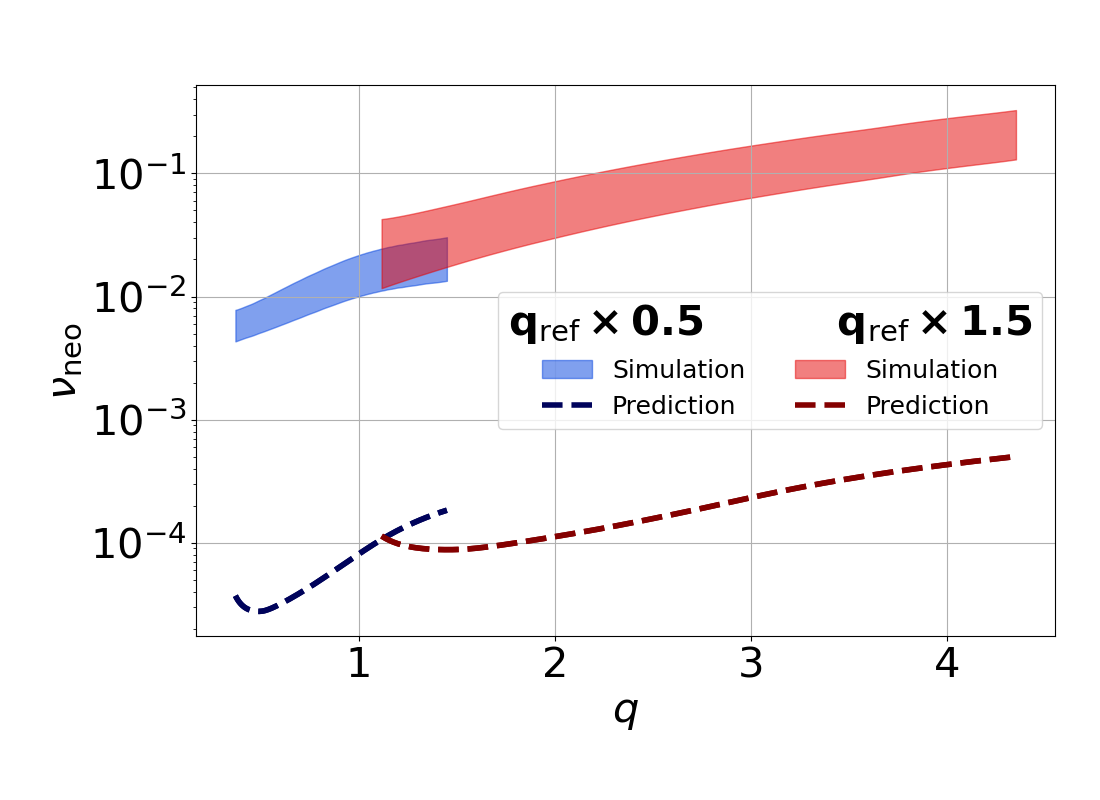

In [30]:
plt.rc('font',size=30)
plt.close('all')

fig = plt.figure(figsize=(11,8))

fig.set_dpi(dpi_custom)

ax_nutheta = fig.add_subplot(111)
bool_second_member = False

q05_bool = False
q15_bool = not q05_bool


q05_ar = [q05_v05, q05_v025, q05_v0, q05_vm05]
tmin_05  ,tmax_05   = 40e3, 50e3
tmin_05  ,tmax_05   = 49.5e3, 50e3

q15_ar=[q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_vm1_new, q15_v1_new]
tmin_15  ,tmax_15   = 125e3, 135e3
tmin_15  ,tmax_15   = 134.5e3, 135e3

rhomin_avg,rhomax_avg = 0.15, 0.85

#VP_x = np.array([]); dtVP_y = np.array([])

color1_05 = 'xkcd:blue'
color2_05 = 'xkcd:dark blue'
color1_15 = 'xkcd:red'
color2_15 = 'xkcd:dark red'

param = 'VP'

for q_ar,tmin_avg,tmax_avg,c1,c2,title in zip([q05_ar,q15_ar],[tmin_05,tmin_15],[tmax_05,tmax_15],[color1_05,color1_15],[color2_05,color2_15],[r'$q_{\rm ref} \times 0.5$',r'$q_{\rm ref} \times 1.5$']):
    for iv,v in enumerate(q_ar):
            
        itmin_avg, itmax_avg = np.searchsorted(v['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(v['rho'],[rhomin_avg,rhomax_avg])

        if   bool_second_member:x0 = np.mean(v[param][itmin_avg:itmax_avg,:],axis=0)
        else:x0                    = np.mean(v[param][itmin_avg:itmax_avg,:]-v[param][itmax_avg,:],axis=(0))
        y0                  = np.mean(v['dt'+param][itmin_avg:itmax_avg,:],axis=0)

        if iv==0:
            x = x0[np.newaxis,:]
            y = y0[np.newaxis,:]

        ## Append VP_x and dtVP_y for linear regression
        else:
            x = np.append(x,x0[np.newaxis,:],axis=0)
            y = np.append(y,y0[np.newaxis,:],axis=0)
        
    # ## Linear regression
    slope_ar, intercept_ar, r_value_ar, p_value_ar, std_err_ar = (np.array([]) for i in range(5))

    for ir in range(x.shape[1]):
        slope, intercept, r_value, p_value, std_err = linregress(x[:,ir],y[:,ir])
        slope_ar     = np.append(slope_ar,slope)
        intercept_ar = np.append(intercept_ar,intercept)
        r_value_ar   = np.append(r_value_ar,r_value)
        p_value_ar   = np.append(p_value_ar,p_value)
        std_err_ar   = np.append(std_err_ar,std_err)

    rho         = q_ar[0]['rho'][irhomin:irhomax]
    eps         = q_ar[0]['eps'][irhomin:irhomax]
    qabs        = q_ar[0]['q'][irhomin:irhomax]
    nustar      = np.mean(q_ar[0]['nustar'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    q_on_eps_sq = (qabs/eps)**2

    nutheta_estimated = -slope_ar[irhomin:irhomax]
    Vneo_estimated    = (intercept_ar/slope_ar)[irhomin:irhomax]
    mui_gianakon      = np.mean(q_ar[0]['nutheta_Gianakon'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    nu_i              = np.mean(q_ar[0]['nu_i'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    nutheta_gianakon  = mui_gianakon*q_on_eps_sq

    rho    = q_ar[0]['rho'][irhomin:irhomax]
    qabs   = q_ar[0]['q'][irhomin:irhomax]
    nustar = np.mean(q_ar[0]['nustar'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

    inertia_factor = 1+2*qabs**2
    inertia_factor_banana = 1 + 2*qabs**2 + (1.6*qabs**2/np.sqrt(eps) ) 

    xcoord = qabs

    # ax_nutheta.semilogy(xcoord,nutheta_estimated*inertia_factor,label=title + r' - Estimated $\nu_{\rm neo}$',color=c1)
    # ax_nutheta.semilogy(xcoord,nutheta_estimated*inertia_factor_banana,label=title + r' - banana Estimated $\nu_{\rm neo}$',color=c1,ls='--')

    ax_nutheta.fill_between(xcoord,nutheta_estimated*inertia_factor_banana,nutheta_estimated*inertia_factor,color=c1,alpha=0.5,label='Simulation')

    #ax_nutheta.fill_between(xcoord,nutheta_estimated*inertia_factor_banana*nustar,nutheta_estimated*inertia_factor*nustar,color=c1,alpha=0.5,label='Simulation')

    ax_nutheta.plot(xcoord,nutheta_gianakon,label=r'Prediction',color=c2,ls='--',lw=4)
    ax_nutheta.plot(xcoord,nutheta_gianakon,color=c2,ls='--',lw=4)
    
    
    ## set log scale
    ax_nutheta.set_yscale('log')

    ax_nutheta.set_ylabel(r'$\nu_{\rm neo}$')

    if xcoord[0]==rho[0]:ax_nutheta.set_xlabel(r'$r/a$')
    if xcoord[0]==qabs[0]:ax_nutheta.set_xlabel(r'$q$')
    if xcoord[0]==nustar[0]:ax_nutheta.set_xlabel(r'$\nu^\star$')
    if xcoord[0]==(nustar*eps)[0]:ax_nutheta.set_xlabel(r'$\nu^\star \times \varepsilon$')

    ax_nutheta.legend(ncol=2, title=r'$\mathbf{q_{\rm ref} \times 0.5}$          $\mathbf{q_{\rm ref} \times 1.5}$',fontsize=18,loc='center right')
    ##


#     axes.axhline(y=0,c='k',ls='--')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## <font color='red'>**Résultat**</font> - <font color='lime'>**(Papier)**</font>  Profil radial de VP ou VE

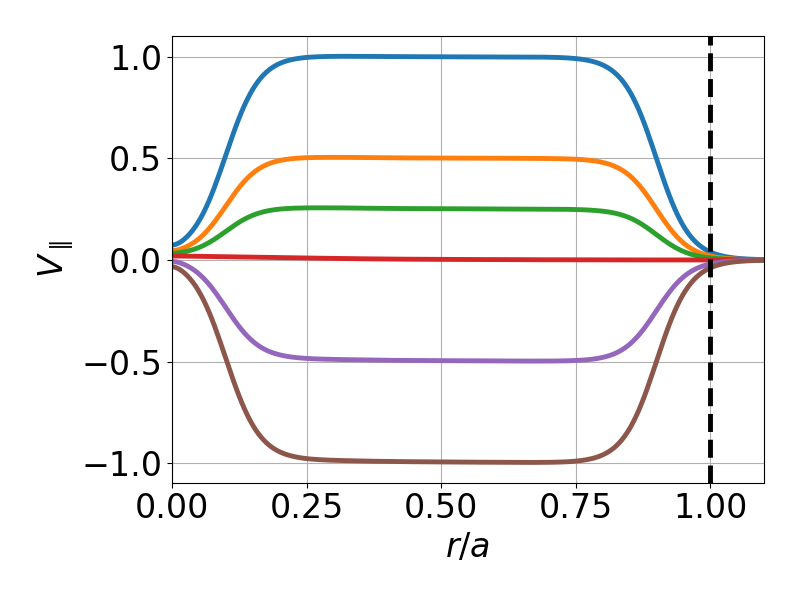

In [25]:
plt.rcParams['lines.linewidth'] = 3.5
plt.rc('font',size=24)

q05_sim = [q05_v1, q05_v05, q05_v025, q05_v0, q05_vm05, q05_vm1]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for q in q05_sim:
    ax.plot(q['rho'],q['VT'][1,:])
ax.set_xlabel(r'$r/a$')
ax.set_ylabel(r'$V_\parallel$')
ax.set_xlim(0,1.1)

ax.axvline(x=1,c='k',ls='--')

fig.tight_layout()

## <font color='springgreen'>**Travail en cours**</font> - Estimation de $k$ sur une seule simulation

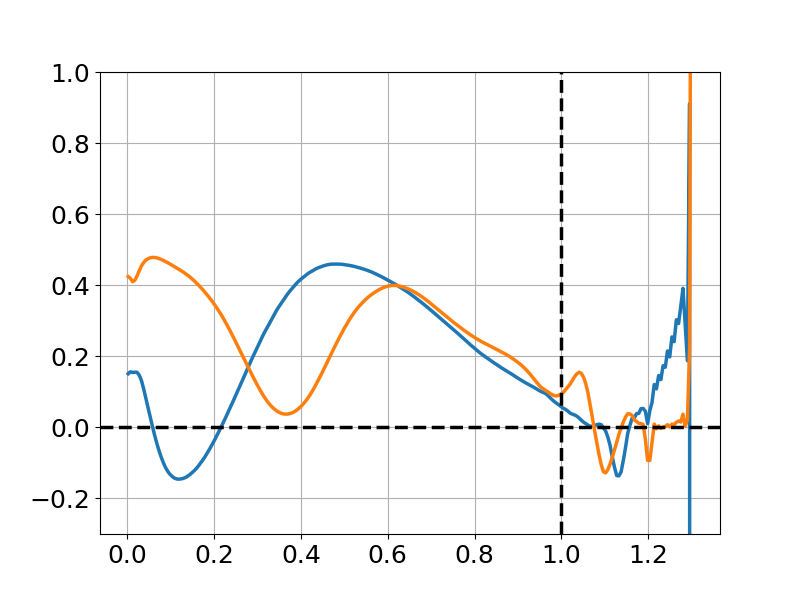

In [54]:
q05 = q05_v0
q15 = q15_v0_new

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(q05['rho'],q05['VP'][-1,:] / q05['drT'][-1,:]) 
ax.plot(q15['rho'],q15['VP'][-1,:] / q15['drT'][-1,:]) 

ax.set_ylim(-0.3,1)
ax.axvline(x=1,c='k',ls='--')
ax.axhline(y=0,c='k',ls='--')

## <font color='springgreen'>**Travail en cours**</font> - $\nu_{neo}$ avec simulations sans $\nabla T$

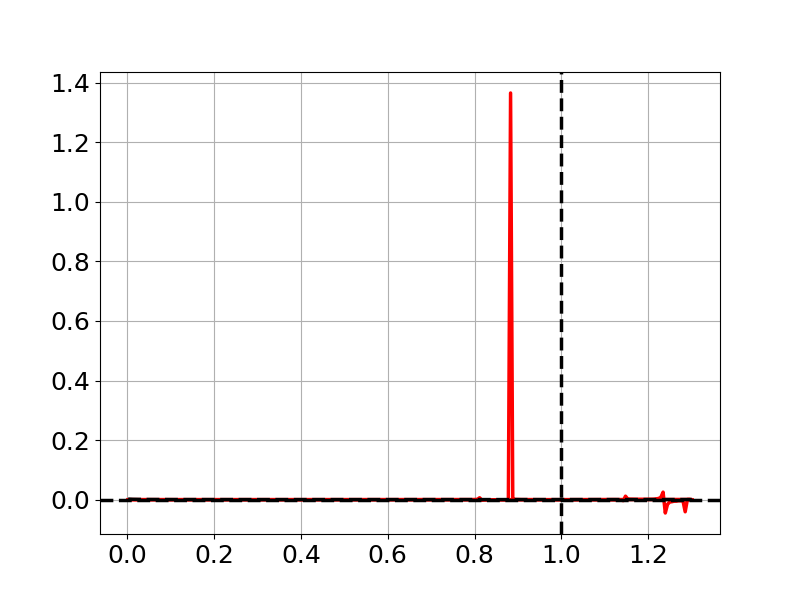

In [32]:
clear_output()

q15_vm025 = q15_vm025_new_gradT0
q15_v025   = q15_v025_new_gradT0 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

for q in [q15_vm025,q15_v025]:
    VP    = SA(q['VP'],N=1,axis=0)
    dtVP  = SA(q['dtVP'],N=1,axis=0)
    Jrneo = SA(q['Jr_neo_norm'],N=60,axis=0)
    
    # nuneo = np.mean((dtVP / VP)[-2:-1,:] ,axis=0)
    nuneo = -np.mean((Jrneo / VP)[-2:-1,:] ,axis=0)

    ax.plot(q15_vm025['rho'],nuneo)


ax.plot(q15_v025['rho'],q15_v025['nuneo_Gianakon'][-1,:],ls='--',color='k')

#ax.set_ylim(-1e-4,1e-4)
ax.axvline(x=1,c='k',ls='--')
ax.axhline(y=0,c='k',ls='--')

## <font color='springgreen'>**Travail en cours**</font> - $\nu_{neo}$ avec (x,y) arbitraire

interactive(children=(Text(value='VP', continuous_update=False, description='Select parameter:', placeholder='…

<function __main__.update_plot(param1, param2, float_range_rho, float_range_time, bool_second_membre, bool_rprof, select_sim, dpi_adjust)>

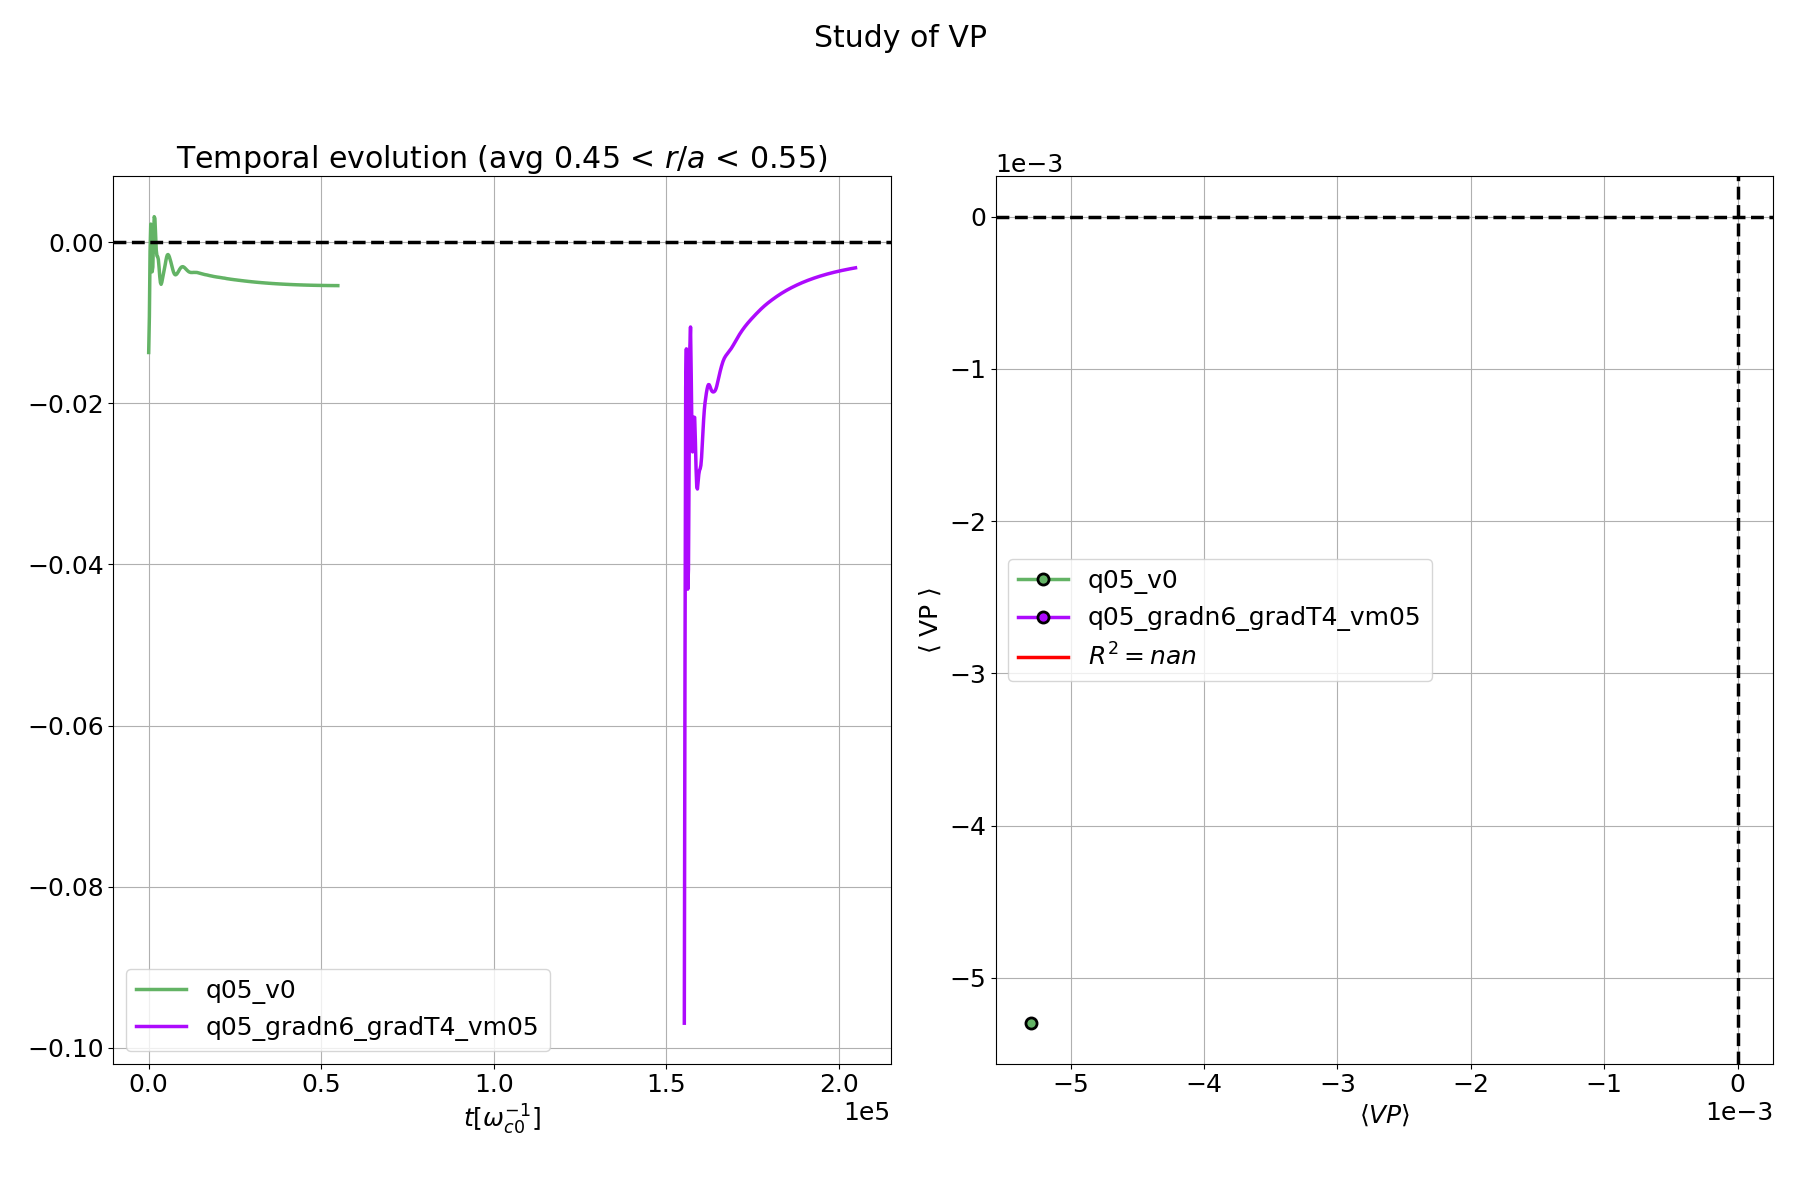

In [5]:
clear_output()
import matplotlib.gridspec as gridspec

plt.close('all')

fig = plt.figure(figsize=(18,12))

def update_plot(param1,param2,float_range_rho,float_range_time,bool_second_membre,bool_rprof,
                select_sim,dpi_adjust):

    q_ar = [q for q in all_sim if q['title'] in select_sim]
    tmin_avg  ,tmax_avg   = float_range_time
    rhomin_avg,rhomax_avg = float_range_rho

    ## Set dpi of figure
    fig.set_dpi(dpi_adjust)

    ## Clear previous plot
    fig.clf()

    nb_plots = 2 + bool_rprof
    gs = gridspec.GridSpec(1, nb_plots, figure=fig)

    ax_tevol = fig.add_subplot(gs[0])
    ax_reg = fig.add_subplot(gs[1])

    ## Set axes customizations
    ax_tevol.set_title(r'Temporal evolution (avg %.2f < $r/a$ < %.2f)' % (rhomin_avg , rhomax_avg) )
    fig.suptitle(r'Study of %s' %param1)
    
    ## Define x and y for linear regression
    x = np.array([]); y = np.array([])

    for q in q_ar:

        itmin_avg, itmax_avg = np.searchsorted(q['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(q['rho'],[rhomin_avg,rhomax_avg])

        ## Plot temporal evolution
        ax_tevol.plot(q['time'], np.mean( q[param1][:,irhomin:irhomax],axis=1),c=q['c'],label=q['title'])
        # ax_tevol.plot(q['time'], SA(np.mean( q[param1][:,irhomin:irhomax],axis=1),axis=0),c=q['c'],label=q['title'])

        ## Append x and y for linear regression
        x_to_add = np.mean(q[param1][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1))
        y_to_add = np.mean(q[param2][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1))

        #x = np.append(x,x_to_add - alpha*np.mean(q['drT'][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1)))
        x = np.append(x,x_to_add)
        y = np.append(y,y_to_add)

        ## Plot points in VP, dtVP space
        ax_reg.plot( x[-1], y[-1], c=q['c'], marker='o', label=q['title'])
        
    ## Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    
    ## Plot linear regression
    ax_reg.plot(x, intercept + slope*x, 'r', label=r'$R^2 = %.2f$' % (r_value**2))
    ax_reg.set_xlabel(r'$\langle %s \rangle$' %param1)
    ax_reg.set_ylabel(r'$\langle$ %s $\rangle$' %param2)
    ax_reg.axhline(y=0,c='k',ls='--')
    ax_reg.axvline(x=0,c='k',ls='--')

    ## Axes customizations
    ax_tevol.set_xlabel(r'$t[\omega_{c0}^{-1}]$')
    ax_tevol.axhline(y=0,c='k',ls='--')
    ax_tevol.legend(); ax_reg.legend()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
float_range_time_slider = widgets.FloatRangeSlider(value=[40e3, 50e3], min=0, max=210e3, step=1000, description='Time range', layout=Layout(width='50%'), continuous_update=False)
float_range_rho_slider  = widgets.FloatRangeSlider(value=[0.45, 0.55], min=0.1, max=1.3, step=0.01, description='rho range', layout=Layout(width='50%'), continuous_update=False)

param1_widget = widgets.Text(value='VP',placeholder='Type something',description='Select parameter:', continuous_update=False)
param2_widget = widgets.Text(value='VP',placeholder='Type something',description='Select parameter:', continuous_update=False)

interact(update_plot, 
         float_range_time = float_range_time_slider,
         float_range_rho  = float_range_rho_slider,
         bool_second_membre = widgets.Checkbox(value=False,description='Sans second membre',disabled=False),
         bool_rprof = widgets.Checkbox(value=False,description='Plot radial profiles',disabled=False),
         param1 = param1_widget,
         param2 = param2_widget,
         **custom_widgets
        )

## <font color='springgreen'>**Travail en cours**</font> - Profil radial de $\nu_{neo}$ avec (x,y) arbitraire

interactive(children=(FloatRangeSlider(value=(40000.0, 50000.0), continuous_update=False, description='Time ra…

<function __main__.update_plot(float_range_time)>

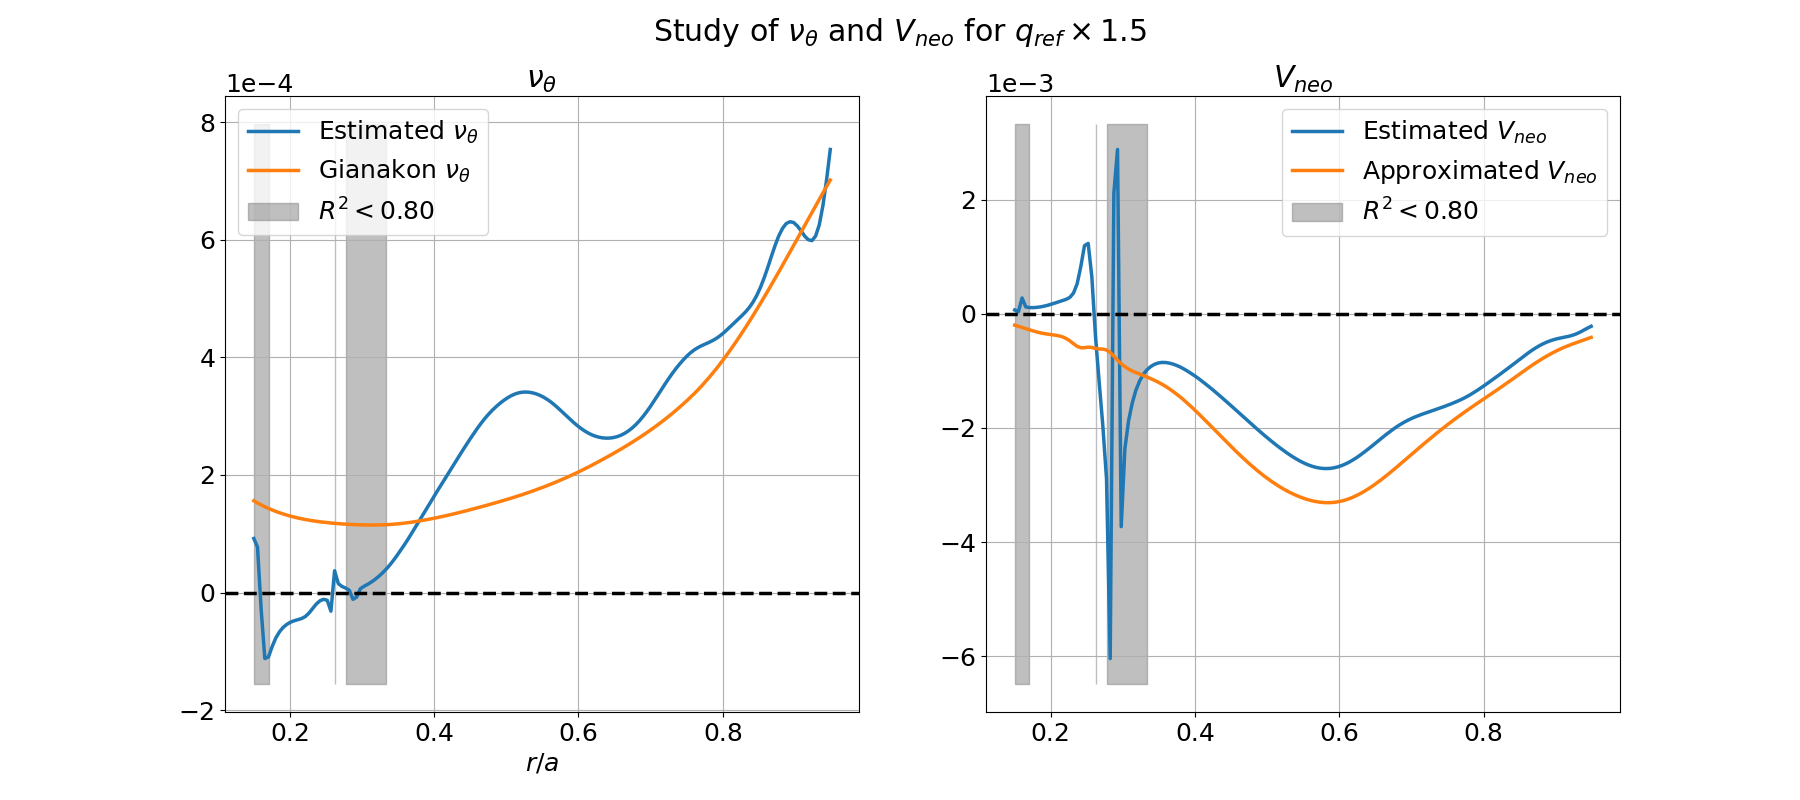

In [41]:
clear_output()
plt.close('all')

fig = plt.figure(figsize=(18,8))
fig.set_dpi(dpi_custom)

q05_bool = False
q15_bool = not q05_bool

param1 = 'VP'
param2 = 'Jr_neo_norm'

def update_plot(float_range_time):
    # for axes in fig.get_axes():axes.clear()
    plt.clf()
    if q05_bool:
        # q_ar = [q05_v05, q05_v025, q05_v0, q05_vm05, q05_v1]
        # q_ar =[q05_gradn6_gradT2, q05_gradn6_gradT4, q05_gradn6_gradT6]
        # q_ar = [q05_gradn6_gradT4_v05, q05_gradn6_gradT4_v025, q05_gradn6_gradT4_vm025, q05_gradn6_gradT4_vm05]
        # q_ar = [q05_v1,q05_v05, q05_v025, q05_v0]
        q_ar = [q05_gradn2_gradT6, q05_gradn4_gradT6, q05_gradn6_gradT6, q05_gradn8_gradT6]
        # tmin_avg  ,tmax_avg   = 37.5e3, 38e3
        # tmin_avg  ,tmax_avg   = 19.0e3, 21.0e3
        # tmin_avg  ,tmax_avg   = 50.0e3, 60e3
        tmin_avg  ,tmax_avg   = float_range_time
        fig.suptitle(r'Study of $\nu_\theta$ and $V_{neo}$ for $q_{REF} \times 0.5$')

    if q15_bool:
        q_ar =[q15_gradn2_gradT6, q15_gradn4_gradT6, q15_gradn6_gradT6, q15_gradn8_gradT6]
        # q_ar =[q15_gradn6_gradT2, q15_gradn6_gradT4, q15_gradn6_gradT6]
        # q_ar = [q15_gradn6_gradT4_v05, q15_gradn6_gradT4_v025, q15_gradn6_gradT4_vm025, q15_gradn6_gradT4_vm05]
        # q_ar=[q15_vm025_new_gradT0,q15_v025_new_gradT0]
        # q_ar=[q15_v0_new, q15_v05_new, q15_v025_new, q15_v1_new]
        # tmin_avg  ,tmax_avg   = 37.0e3, 40e3
        # tmin_avg  ,tmax_avg   = 130.0e3, 140e3
        tmin_avg  ,tmax_avg   = float_range_time
        fig.suptitle(r'Study of $\nu_\theta$ and $V_{neo}$ for $q_{ref} \times 1.5$')

    rhomin_avg,rhomax_avg = 0.15, 0.95

    #x = np.array([]); y = np.array([])

    for iv,v in enumerate(q_ar):
            
        itmin_avg, itmax_avg = np.searchsorted(v['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(v['rho'],[rhomin_avg,rhomax_avg])

        #itmin_avg = itmax_avg-10

        x0 = np.mean(v[param1][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
        y0 = np.mean(v[param2][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

        ## Test avec sliding average en temps
        # x0 = np.mean(SA(v[param1][itmin_avg:itmax_avg,irhomin:irhomax],axis=0),axis=0)
        # y0 = np.mean(SA(v[param2][itmin_avg:itmax_avg,irhomin:irhomax],axis=0),axis=0)

        if iv==0:
            x = x0[np.newaxis,:]
            y = y0[np.newaxis,:]

        ## Append x and y for linear regression
        else:
            x = np.append(x,x0[np.newaxis,:],axis=0)
            y = np.append(y,y0[np.newaxis,:],axis=0)
        
    # ## Linear regression
    slope_ar, intercept_ar, r_value_ar, p_value_ar, std_err_ar = (np.array([]) for i in range(5))

    for ir in range(irhomax-irhomin):
        slope, intercept, r_value, p_value, std_err = linregress(x[:,ir],y[:,ir])
        slope_ar     = np.append(slope_ar,slope)
        intercept_ar = np.append(intercept_ar,intercept)
        r_value_ar   = np.append(r_value_ar,r_value)
        p_value_ar   = np.append(p_value_ar,p_value)
        std_err_ar   = np.append(std_err_ar,std_err)

    nutheta_estimated = -slope_ar
    Vneo_estimated    = -intercept_ar/slope_ar

    Vneo_approx       = q_ar[0]['VP'][-1,irhomin:irhomax]
    nuneo_gianakon    = np.mean(q_ar[0]['nuneo_Gianakon'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

    inertia_factor = ((1+2*q_ar[0]['q']**2)  )[irhomin:irhomax]
    inertia_factor_banana = ((1+(1.6*q_ar[0]['q']**2/np.sqrt(q_ar[0]['eps']))) )[irhomin:irhomax]
    eps = q_ar[0]['eps'][irhomin:irhomax]

    rho  = q_ar[0]['rho'][irhomin:irhomax]
    qabs = q_ar[0]['q'][irhomin:irhomax]

    xcoord = rho

    ax_nutheta = fig.add_subplot(121); ax_nutheta.set_title(r'$\nu_\theta$')
    ax_nutheta.plot(xcoord,nutheta_estimated,label=r'Estimated $\nu_\theta$')
    ax_nutheta.plot(xcoord,nuneo_gianakon,label=r'Gianakon $\nu_\theta$')
    if xcoord[0]==rho[0]:ax_nutheta.set_xlabel(r'$r/a$')
    else:ax_nutheta.set_xlabel(r'$q$')

    ax_vneo = fig.add_subplot(122); ax_vneo.set_title(r'$V_{neo}$')
    ax_vneo.plot(q_ar[0]['rho'][irhomin:irhomax],Vneo_estimated,label=r'Estimated $V_{neo}$')
    ax_vneo.plot(q_ar[0]['rho'][irhomin:irhomax],Vneo_approx,label=r'Approximated $V_{neo}$')

    ## Fill a x zone with a color where the R^2 is above a threshold
    lim = 0.8
    for axes in [ax_nutheta,ax_vneo]:
        ymin = axes.get_ylim()[0]
        ymax = axes.get_ylim()[1]
        axes.fill_between(q_ar[0]['rho'][irhomin:irhomax],ymin,ymax,where=r_value_ar**2<lim,color='grey',alpha=0.5,label=r'$R^2<%.2f$'%lim)
        axes.legend()
        axes.axhline(y=0,c='k',ls='--')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

float_range_time_slider = widgets.FloatRangeSlider(value=[40e3, 50e3], min=0, max=210e3, step=1000, description='Time range', layout=Layout(width='50%'), continuous_update=False)

interact(update_plot, 
         float_range_time = float_range_time_slider,
         **custom_widgets
        )

## <font color='springgreen'>**Travail en cours**</font> - Retrouver $\nu_\text{neo}$ avec le scan en $\nabla T$

In [1]:
clear_output()
plt.close('all')

fig = plt.figure(figsize=(18,8))
fig.set_dpi(dpi_custom)

q05_bool = False
q15_bool = not q05_bool

param1 = 'VE'
param2 = 'Jr_neo_norm'

def update_plot(float_range_time,alpha):
    # for axes in fig.get_axes():axes.clear()
    plt.clf()
    if q05_bool:
        q_ar =[q05_gradn6_gradT2, q05_gradn6_gradT4, q05_gradn6_gradT6, q05_gradn6_gradT8]
        tmin_avg  ,tmax_avg   = float_range_time
        fig.suptitle(r'Study of $\nu_\theta$ and $V_{neo}$ for $q_{REF} \times 0.5$')

    if q15_bool:
        q_ar =[q15_gradn6_gradT2, q15_gradn6_gradT4, q15_gradn6_gradT6, q15_gradn6_gradT8]
        tmin_avg  ,tmax_avg   = float_range_time
        fig.suptitle(r'Study of $\nu_\theta$ and $V_{neo}$ for $q_{ref} \times 1.5$')

    rhomin_avg,rhomax_avg = 0.15, 0.8

    ax_rprof = fig.add_subplot(111); ax_rprof.set_title(r'Radial profiles')

    for iv,v in enumerate(q_ar):
        itmin_avg, itmax_avg = np.searchsorted(v['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(v['rho'],[rhomin_avg,rhomax_avg])

        nu_neo_estimated = np.mean( (v['Jr_neo_norm'] / (v['VP'] - alpha * v['Vneo_pred']) )[itmin_avg:itmax_avg, irhomin:irhomax],axis=0 )
        nu_neo_gianakon  = np.mean( v['nuneo_Gianakon'][itmin_avg:itmax_avg, irhomin:irhomax],axis=0 )

        ax_rprof.plot(v['rho'][irhomin:irhomax],nu_neo_estimated,label=v['title'])
        ax_rprof.plot(v['rho'][irhomin:irhomax],nu_neo_gianakon,label=v['title'] + ' Gianakon')

        ax_rprof.legend()
        ax_rprof.axhline(y=0,c='k',ls='--')


fig.tight_layout(rect=[0, 0.03, 1, 0.95])

float_range_time_slider = widgets.FloatRangeSlider(value=[40e3, 50e3], min=0, max=170e3, step=1000, description='Time range', layout=Layout(width='50%'), continuous_update=False)
float_slider = widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.01, description='alpha', layout=Layout(width='50%'), continuous_update=False)

interact(update_plot, 
         float_range_time = float_range_time_slider,
         alpha = float_slider,
         **custom_widgets
        )

NameError: name 'clear_output' is not defined

## <font color='royalblue'>**Papier**</font> - Proportionnalité Jrneo et VP

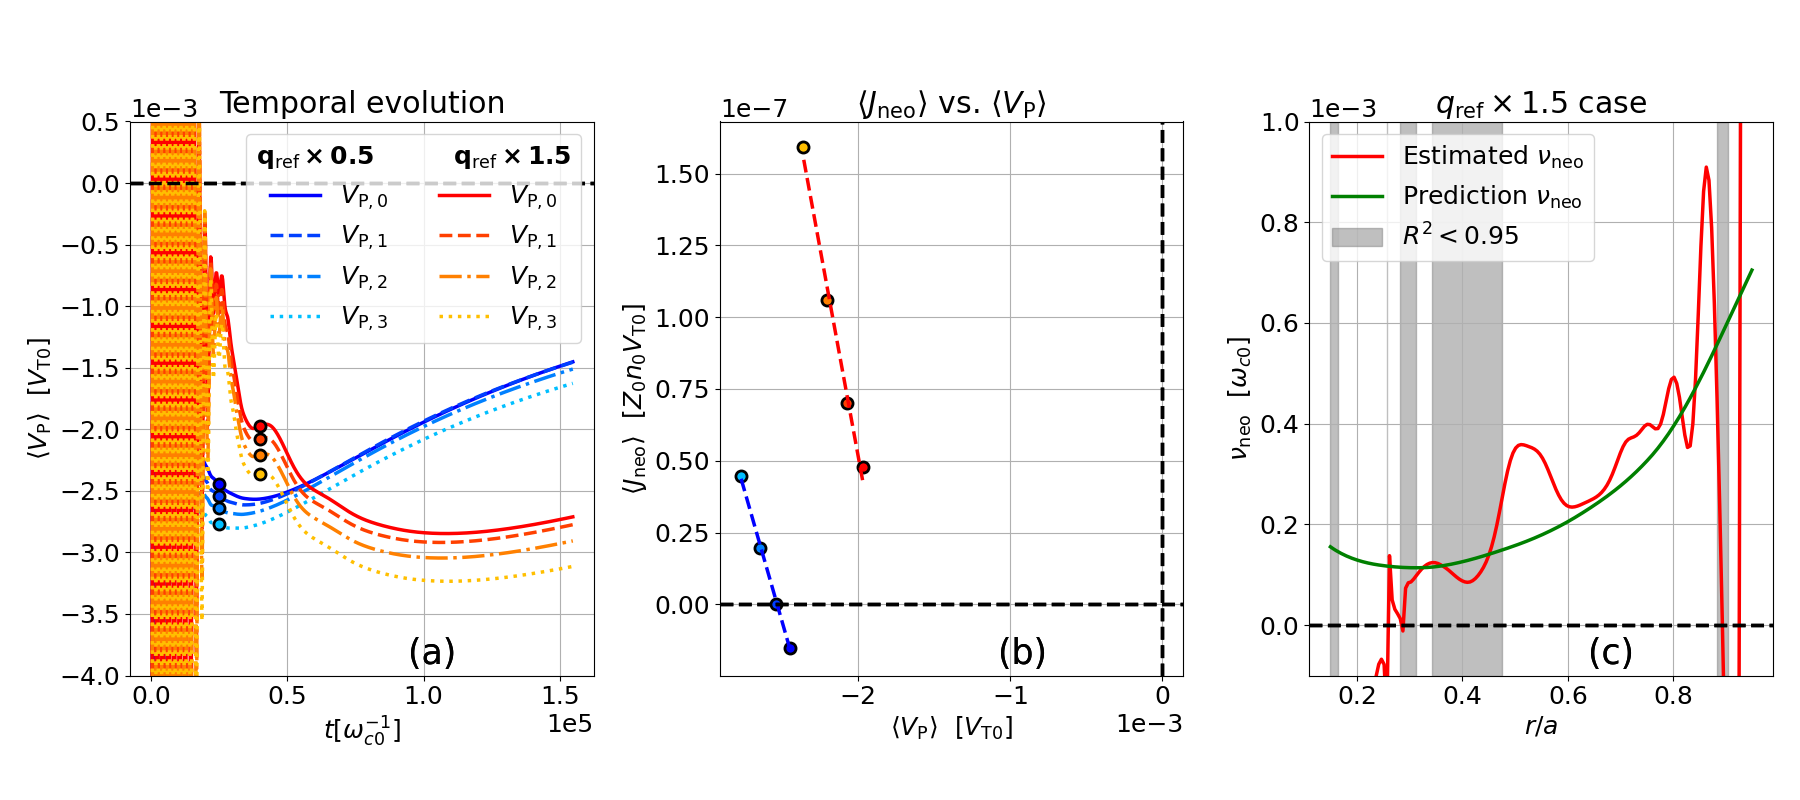

In [16]:
clear_output()
import matplotlib.gridspec as gridspec

plt.close('all')

fig = plt.figure(figsize=(18,8))

q05_ar = [q05_gradn2_gradT6, q05_gradn4_gradT6, q05_gradn6_gradT6, q05_gradn8_gradT6]
q15_ar = [q15_gradn2_gradT6, q15_gradn4_gradT6, q15_gradn6_gradT6, q15_gradn8_gradT6]

q_title_ar = [r'$V_{\rm P,0}$', r'$V_{\rm P,1}$', r'$V_{\rm P,2}$', r'$V_{\rm P,3}$']
q_ls_ar = ['-', '--', '-.', ':']

q05_color_ar = ['#0000ff','#0040ff','#0080ff','#00bfff','#00ffff']
q15_color_ar = ['#ff0000','#ff4000','#ff8000','#ffbf00','#ffff00']
q_color_ar = [q05_color_ar,q15_color_ar]

q_color_reg_ar =['b','r']

rhomin_avg,rhomax_avg = 0.65, 0.7
tdiag_ar   = [25e3, 40e3]

tmin_avg,tmax_avg = 25e3, 40e3

ax_tevol    = fig.add_subplot(131)
ax_reg      = fig.add_subplot(132)
ax_nuneo  = fig.add_subplot(133)

## Define x and y for linear regression
x = np.array([]); y = np.array([])

for iar,q_ar in enumerate([q05_ar,q15_ar]):
    x, y = (np.array([]) for i in range(2))
    for iq,q in enumerate(q_ar):

        itdiag = np.searchsorted(q['time'],[tdiag_ar[iar]])
        irhomin, irhomax     = np.searchsorted(q['rho'],[rhomin_avg,rhomax_avg])

        ## Plot temporal evolution
        ax_tevol.plot(q['time'], np.mean( q['VP'][:,irhomin:irhomax],axis=1),c=q_color_ar[iar][iq],label=q_title_ar[iq], ls=q_ls_ar[iq])
        ax_tevol.plot(q['time'][itdiag], np.mean( q['VP'][itdiag,irhomin:irhomax],axis=1),c=q_color_ar[iar][iq],marker='o')

        ## Append x and y for linear regression
        x_to_add = np.mean(q['VP'][itdiag,irhomin:irhomax],axis=1)
        y_to_add = np.mean(q['Jr_neo_norm'][itdiag,irhomin:irhomax],axis=1)

        #x = np.append(x,x_to_add - alpha*np.mean(q['drT'][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1)))
        x = np.append(x,x_to_add)
        y = np.append(y,y_to_add)

        ## Plot points in VP, dtVP space
        ax_reg.plot( x[-1], y[-1], c=q_color_ar[iar][iq], marker='o', label=q['title'])
        
        ######################
        ## Plot nuneo
        ######################

        itmin_avg, itmax_avg = np.searchsorted(q['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(q['rho'],[0.15,0.95])

        x0nu = q['VP'][itdiag,irhomin:irhomax][0]
        y0nu = q['Jr_neo_norm'][itdiag,irhomin:irhomax][0]

        if iq==0:
            xnu = x0nu[np.newaxis,:]
            ynu = y0nu[np.newaxis,:]

        ## Append x and y for linear regression
        else:
            xnu = np.append(xnu,x0nu[np.newaxis,:],axis=0)
            ynu = np.append(ynu,y0nu[np.newaxis,:],axis=0)
        
    # ## Linear regression
    slope_ar, intercept_ar, r_value_ar, p_value_ar, std_err_ar = (np.array([]) for i in range(5))

    for ir in range(irhomax-irhomin):
        slope, intercept, r_value, p_value, std_err = linregress(xnu[:,ir],ynu[:,ir])
        slope_ar     = np.append(slope_ar,slope)
        intercept_ar = np.append(intercept_ar,intercept)
        r_value_ar   = np.append(r_value_ar,r_value)
        p_value_ar   = np.append(p_value_ar,p_value)
        std_err_ar   = np.append(std_err_ar,std_err)

    nutheta_estimated = -slope_ar
    nuneo_gianakon    = np.mean(q_ar[0]['nuneo_Gianakon'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    if iar==1:
        ax_nuneo.plot(q['rho'][irhomin:irhomax],nutheta_estimated, color='r', label=r'Estimated $\nu_{\rm neo}$')
        ax_nuneo.plot(q['rho'][irhomin:irhomax],nuneo_gianakon, color='g', label=r'Prediction $\nu_{\rm neo}$')
        ax_nuneo.axhline(y=0,c='k',ls='--')
        ## Fill a x zone with a color where the R^2 is above a threshold
        lim = 0.95
        ymin = ax_nuneo.get_ylim()[0]
        ymax = ax_nuneo.get_ylim()[1]
        ax_nuneo.fill_between(q['rho'][irhomin:irhomax],ymin,ymax,where=r_value_ar**2<lim,color='grey',alpha=0.5,label=r'$R^2<%.2f$'%lim)
        ax_nuneo.legend()
        ax_nuneo.axhline(y=0,c='k',ls='--')

            ######################
            ## End plot nuneo
            ######################

    ax_tevol.set_ylabel(r'$\langle V_{\rm P} \rangle ~~ [V_{\rm T0}]$')

    ## Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x,y)

    ## Plot linear regression
    ax_reg.set_title(r'$\langle J_{\rm neo} \rangle$ vs. $\langle V_{\rm P} \rangle$')
    ax_reg.plot(x, intercept + slope*x, q_color_reg_ar[iar], ls='--')#, label=r'$R^2 = %.2f$' % (r_value**2))
    ax_reg.set_xlabel(r'$\langle V_{\rm P} \rangle ~~ [V_{\rm T0}]$')
    ax_reg.set_ylabel(r'$\langle J_{\rm neo} \rangle ~~ [Z_0 n_0 V_{\rm T0}]$')
    ax_reg.axhline(y=0,c='k',ls='--')
    ax_reg.axvline(x=0,c='k',ls='--')

    ## Axes customizations
    ax_tevol.set_title(r'Temporal evolution')
    ax_tevol.set_xlabel(r'$t[\omega_{c0}^{-1}]$')
    ax_tevol.axhline(y=0,c='k',ls='--')
    ax_tevol.legend(ncol=2, title=r'$\mathbf{q_{\rm ref} \times 0.5}$          $\mathbf{q_{\rm ref} \times 1.5}$',fontsize=18,loc='upper right')
    ax_tevol.set_ylim(-4e-3,0.5e-3)

    ax_nuneo.set_title(r'$q_{\rm ref} \times 1.5$ case')
    ax_nuneo.set_xlabel(r'$r/a$')
    ax_nuneo.set_ylabel(r'$\nu_{\rm neo} ~~ [\omega_{c0}]$')
    ax_nuneo.set_ylim(-1e-4,1e-3)

    ax_tevol.text(0.6,0.02,r'(a)',transform=ax_tevol.transAxes,fontsize=25)#, bbox=dict(facecolor='white', boxstyle='round,pad=0.1'))
    ax_reg.text(0.6,0.02,r'(b)',transform=ax_reg.transAxes,fontsize=25)#, bbox=dict(facecolor='white', boxstyle='round,pad=0.1'))
    ax_nuneo.text(0.6,0.02,r'(c)',transform=ax_nuneo.transAxes,fontsize=25)#, bbox=dict(facecolor='white', boxstyle='round,pad=0.1', edgecolor='gray'))

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.savefig('Figures/nuneo_study.pdf', format='pdf', bbox_inches='tight')

    